In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib
import math
import seaborn as sns

import platform
from matplotlib import font_manager, rc
matplotlib.rcParams['axes.unicode_minus'] = False # 그래프에서 음수 표현 가능하도록 설정.

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup as bs
import time, random, schedule, ctypes, os
from datetime import datetime
import requests

from pathlib import Path
import shutil

In [3]:
# 한글 폰트 지정
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")

In [4]:
# dir_path = 'C:/Users/User/Desktop/wantreez/음원사재기/2022_05_02-2022_05_08/total_unique.xlsx'
# outliers_df = pd.read_excel(dir_path)
# outliers_df.reset_index(drop=True, inplace=True)
# outliers_df.head()

In [4]:
# dir_path = 'C:/Users/User/Desktop/wantreez/음원사재기/2022_05_02-2022_05_08/outliers_datalab_20220509'
# file_list = os.listdir(dir_path)
# file_list[:3]

['Blueming.xlsx', 'Celeb.xlsx', 'D-DAY.xlsx']

In [5]:
# df_path = os.path.join(dir_path, file_list[0])
# df = pd.read_excel(df_path)
# df.columns = ['날짜', 'data']
# df = df[6:]
# df['날짜'] = pd.to_datetime(df['날짜'])
# df.head()

C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,날짜,data
6,2022-02-08,35.78947
7,2022-02-09,37.19298
8,2022-02-10,38.24561
9,2022-02-11,38.94736
10,2022-02-12,48.07017


In [6]:
# df = df.loc[('2022-05-02' <= df['날짜']) & (df['날짜'] <= '2022-05-08')]
# df['data'] = df['data'].astype('float')
# df

,날짜,data
89,2022-05-02,50.87719
90,2022-05-03,36.14035
91,2022-05-04,48.42105
92,2022-05-05,55.43859
93,2022-05-06,60.70175
94,2022-05-07,48.77192
95,2022-05-08,54.73684


## 그래프 그리기

In [53]:
path = 'C:/data/Wantreez/Crawling/music/crawled_data/outlier_data/2022-05-02_2022-05-08/'
dir_path = path + '20220502_20220508_outliers.xlsx'
outliers_df = pd.read_excel(dir_path)

# 곡 중에서 괄호, ? 제거
# ?는 파일명으로 할 수 없음
outliers_df['곡'] = outliers_df['곡'].apply(lambda x: x.split( '(' )[0].strip() )
outliers_df['곡'] = outliers_df['곡'].apply(lambda x: x.replace('?', ''))

In [54]:
outliers_df.head()

,날짜,사이트,순위,곡,가수,앨범,소속사,소속사_분류,순위변동,순위변동평균(양수)
0,2022-05-02,flo,17.0,신호등,이무진,신호등,빅플래닛메이드,기타,0.0,5.0
1,2022-05-02,flo,33.0,회전목마,sokodomo,쇼미더머니 10 Episode 2,SONY MUSIC,기타,0.0,4.5
2,2022-05-02,flo,42.0,리무진,BE'O (비오),쇼미더머니 10 Episode 3,스윙,스윙,0.0,4.0
3,2022-05-02,flo,77.0,사계,태연 (TAEYEON),사계 (Four Seasons),SM,SM,0.0,5.5
4,2022-05-02,flo,84.0,Stronger,Kelly Clarkson,Stronger (Deluxe Version),해외,기타,0.0,6.5


In [55]:
len(outliers_df['곡'].unique()), outliers_df['곡'].unique()

(47,
 array(['신호등', '회전목마', '리무진', '사계', 'Stronger', '롤린', '아버지', '사랑해 진짜',
        'FEARLESS', '초대', '나의 월요일', '마지막 너의 인사', 'LOVE', 'Step Back',
        '꽃 길', '모든 날, 모든 순간', '사랑인가 봐', '무지개', '언제나 사랑해', 'Bad Habits',
        'Butter', '흔들리는 꽃들 속에서 네 샴푸향이 느껴진거야', 'Blueming', '이제는', '헤픈 우연',
        'Savage', '고백', '만개', '낙하', '나보다 더 사랑해요', '우연히 봄', 'ZOOM',
        '나의 X에게', 'Celeb', '감동이야', '나는 트로트가 싫어요', '취기를 빌려', '벚꽃 엔딩', '봄날',
        '서랍', 'Heat Waves', 'With you', '너의 번호를 누르고', 'Whisky on the Rock',
        'D-DAY', '다시 만날 수 있을까', '봄 to 러브'], dtype=object))

In [56]:
try:
    os.chdir(path + 'outliers_datalab_20220511')
except:
    pass

In [65]:
file_list = os.listdir()
len(file_list), file_list[:5]

(59,
 ['Bad Habits.xlsx',
  'Blueming.xlsx',
  'Butter.xlsx',
  'Celeb.xlsx',
  'D-DAY.xlsx'])

In [59]:
naver_df = pd.read_excel(file_list[0])
naver_df.head(10)

C:\Users\kbjung\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,url,http://datalab.naver.com/keyword/trendResult.naver?hashKey=N_ae3b188bfff6a591028940779d5fb715
0,주제,통검
1,범위,합계
2,기간,일간 : 2022-02-10 ~ 2022-05-10
3,성별,"전체(여성,남성)"
4,연령대,전체
5,날짜,Bad Habits
6,2022-02-10,61.63793
7,2022-02-11,54.74137
8,2022-02-12,85.77586
9,2022-02-13,65.94827


In [45]:
df = naver_df[ (naver_df['url'] >= '2022-05-02') & (naver_df['url'] <= '2022-05-08')].reset_index(drop=True)
df.columns = ['날짜', '검색비율']
df

,날짜,검색비율
0,2022-05-02,69.39655
1,2022-05-03,74.56896
2,2022-05-04,69.82758
3,2022-05-05,75.86206
4,2022-05-06,78.01724
5,2022-05-07,78.87931
6,2022-05-08,76.72413


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      7 non-null      object
 1   검색비율    7 non-null      object
dtypes: object(2)
memory usage: 240.0+ bytes


In [47]:
df['검색비율'] = df['검색비율'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      7 non-null      object 
 1   검색비율    7 non-null      float64
dtypes: float64(1), object(1)
memory usage: 240.0+ bytes


In [32]:
title = file_list[0].split('.')[0]
title

'Bad Habits'

In [33]:
colors = sns.color_palette('RdPu', df.shape[0])

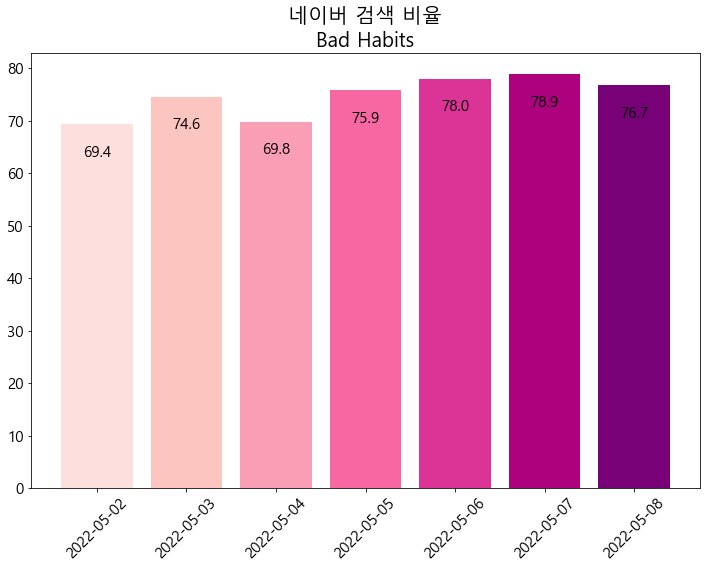

In [49]:
x = df['날짜']
y = df['검색비율']
plt.figure( figsize=(12,8) )
plt.bar(x, y, color=colors)
plt.title(f"네이버 검색 비율\n{title}", fontsize=20)
plt.xticks(fontsize=15,rotation=45)
plt.yticks( fontsize=15)
interval_ratio = math.ceil( max(y) )*0.05
interval_ratio2 = math.ceil( max(y) )*0.2
for i in range( len(y) ):
        if y[i] <= interval_ratio2:
            plt.text(x[i], y[i]+interval_ratio, round(y[i],1), fontsize=15, color='black',
                    horizontalalignment='center',
                    verticalalignment='bottom')
        else:
            plt.text(x[i], y[i]-interval_ratio, round(y[i],1), fontsize=15, color='black',
                    horizontalalignment='center',
                    verticalalignment='top')

## 그래프

Bad Habits.xlsx
Blueming.xlsx


C:\Users\kbjung\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Butter.xlsx
Celeb.xlsx
D-DAY.xlsx
FEARLESS.xlsx
Heat Waves.xlsx
LOVE.xlsx
Savage.xlsx
Step Back.xlsx
Stronger (What Doesn't Kill You).xlsx
Stronger.xlsx
Whisky on the Rock.xlsx
With you.xlsx
ZOOM.xlsx
감동이야 (feat. 성시경).xlsx
감동이야.xlsx
고백.xlsx
꽃 길.xlsx
나는 트로트가 싫어요.xlsx
나보다 더 사랑해요.xlsx
나의 X에게.xlsx


C:\Users\kbjung\AppData\Local\Temp/ipykernel_13300/1433777378.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure( figsize=(12,8) )


나의 월요일.xlsx
낙하 (With 아이유).xlsx
낙하.xlsx
너의 번호를 누르고.xlsx
다시 만날 수 있을까.xlsx
롤린 (Rollin').xlsx
롤린.xlsx
리무진 (Feat. MINO) (Prod. GRAY).xlsx
리무진.xlsx
마지막 너의 인사.xlsx
만개 (Prod. 신지후).xlsx
만개.xlsx
모든 날, 모든 순간 (Every day, Every Moment).xlsx
모든 날, 모든 순간.xlsx
무지개.xlsx
벚꽃 엔딩.xlsx
봄 to 러브.xlsx
봄날.xlsx
사계 (Four Seasons).xlsx
사계.xlsx
사랑인가 봐 (Acoustic Ver.).xlsx
사랑인가 봐.xlsx
사랑해 진짜.xlsx
서랍.xlsx
신호등.xlsx
아버지.xlsx
언제나 사랑해.xlsx
우연히 봄.xlsx
이제는 (Feat. 화사).xlsx
이제는.xlsx
초대.xlsx
취기를 빌려 (취향저격 그녀 X 산들).xlsx
취기를 빌려.xlsx
헤픈 우연.xlsx
회전목마 (Feat. Zion.T, 원슈타인) (Prod. Slom).xlsx
회전목마.xlsx
흔들리는 꽃들 속에서 네 샴푸향이 느껴진거야.xlsx


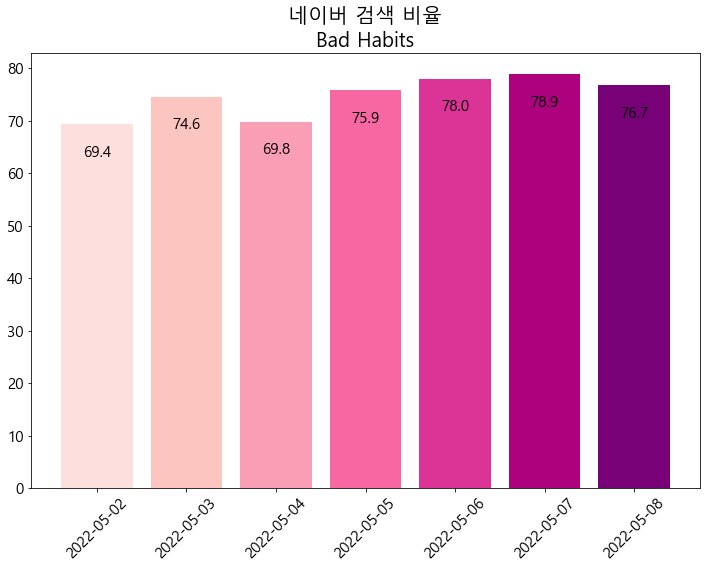

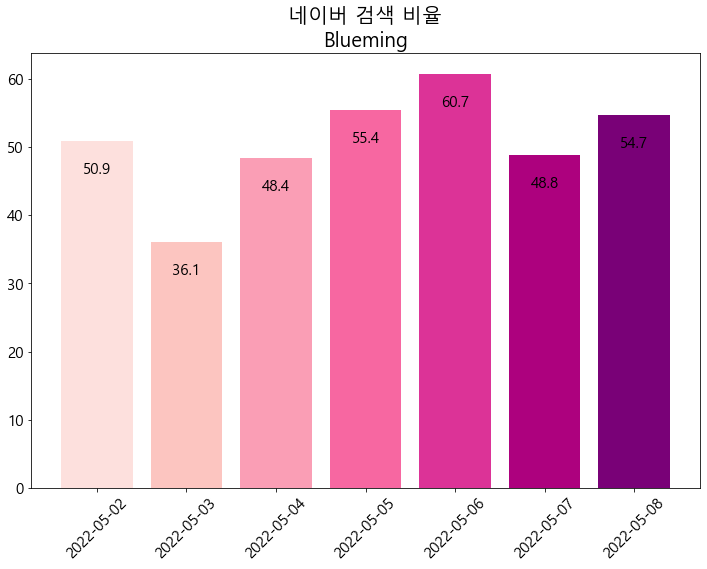

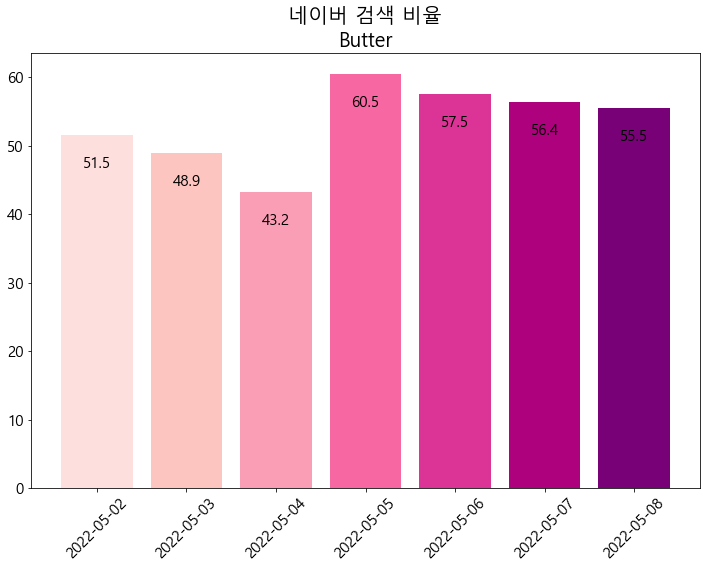

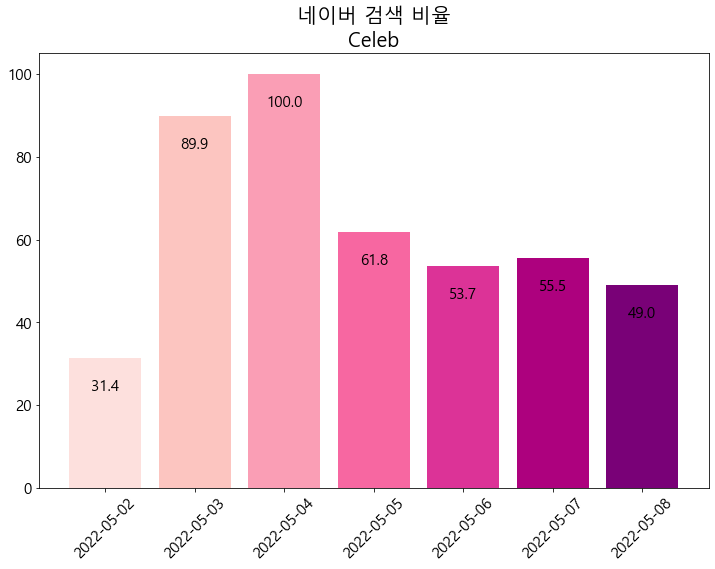

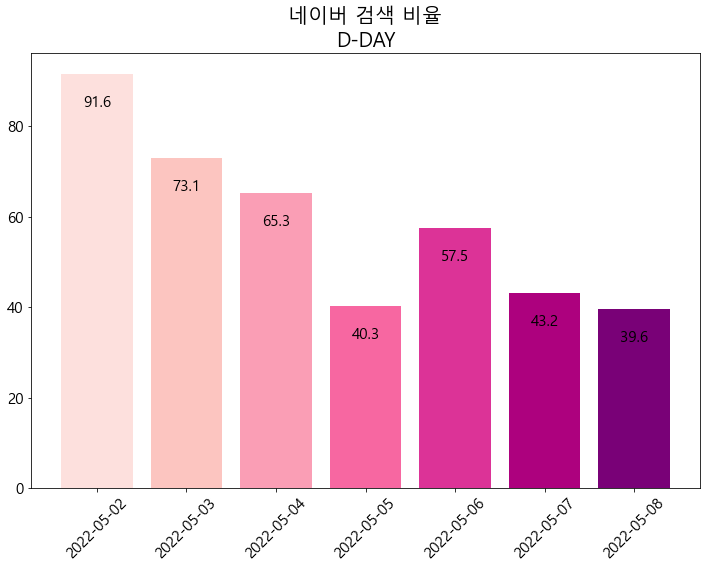

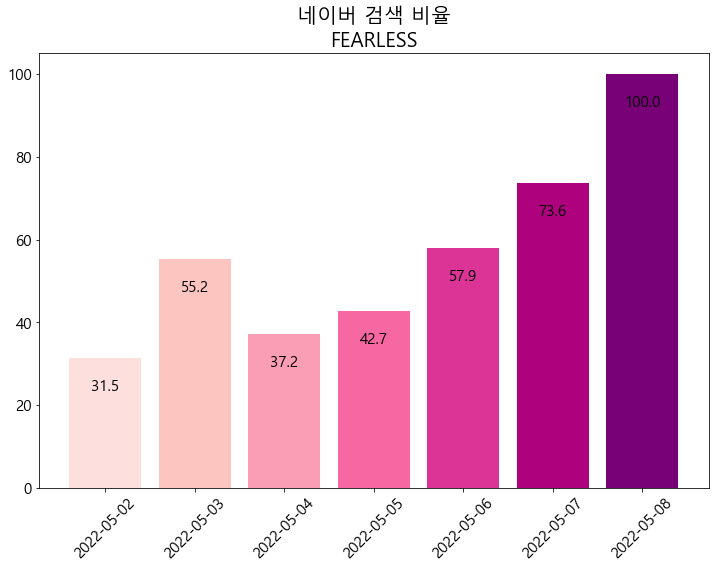

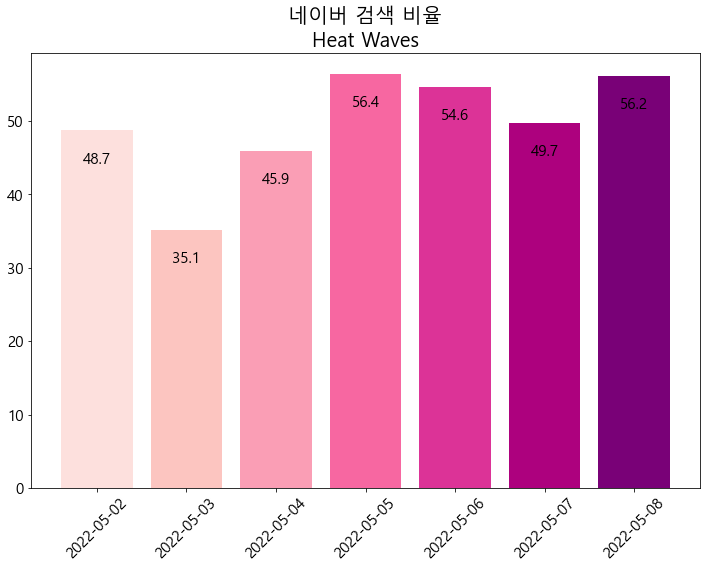

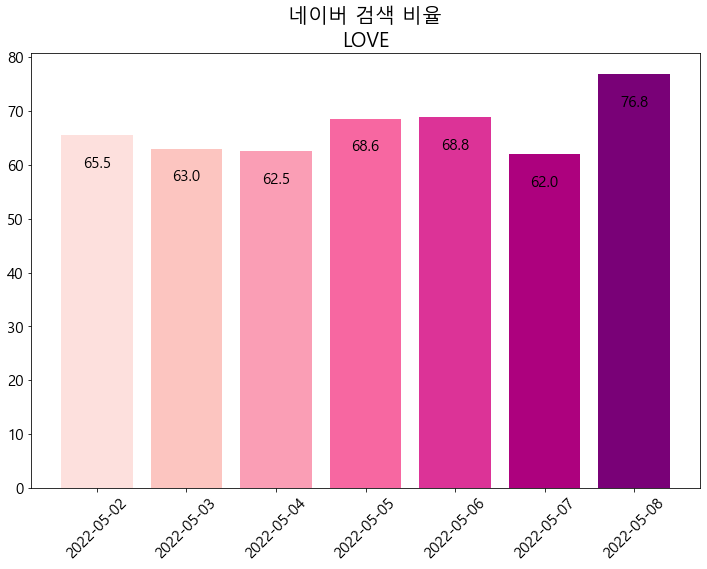

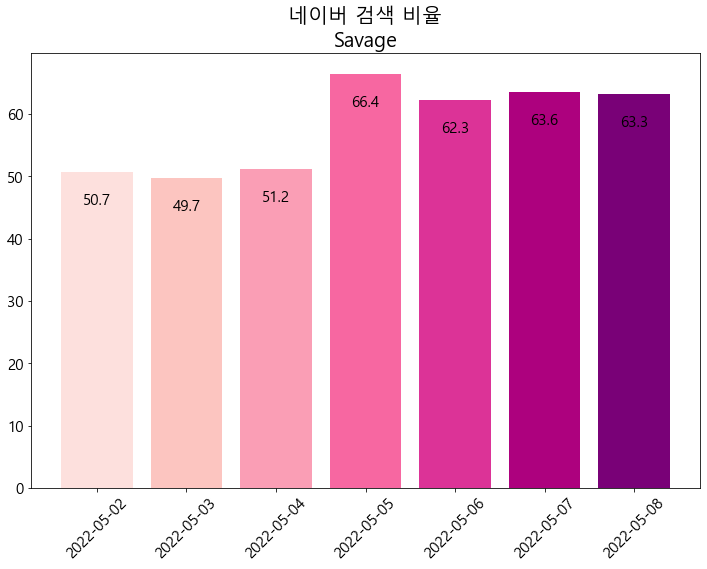

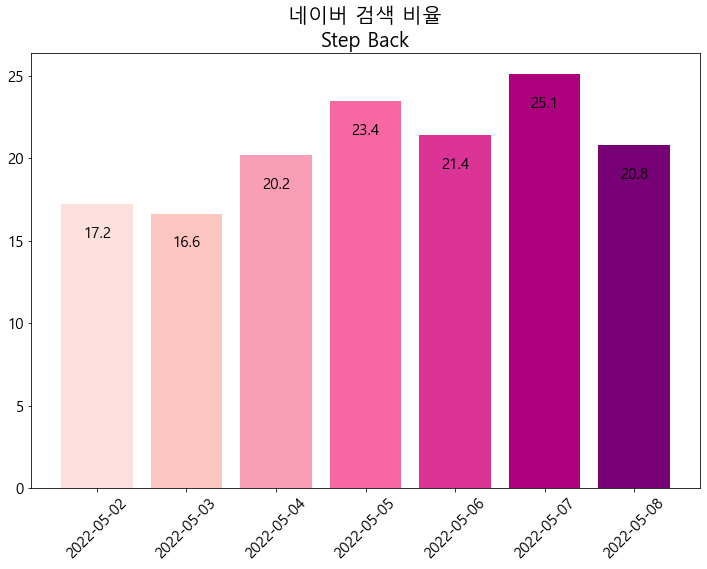

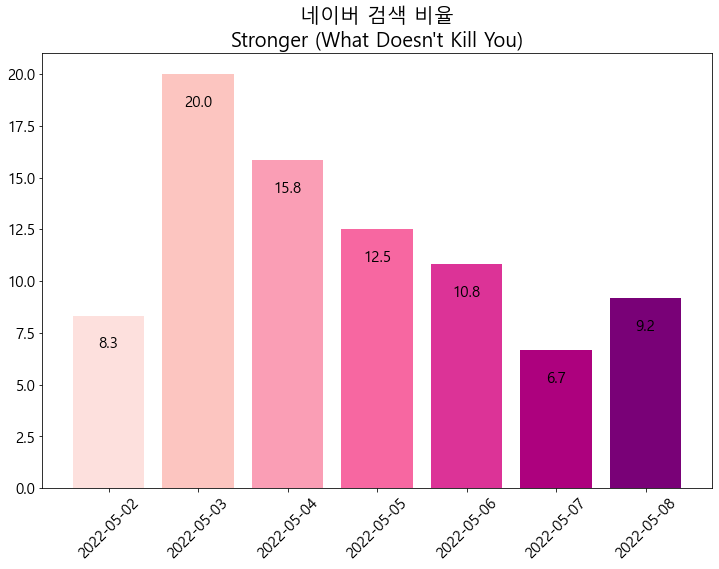

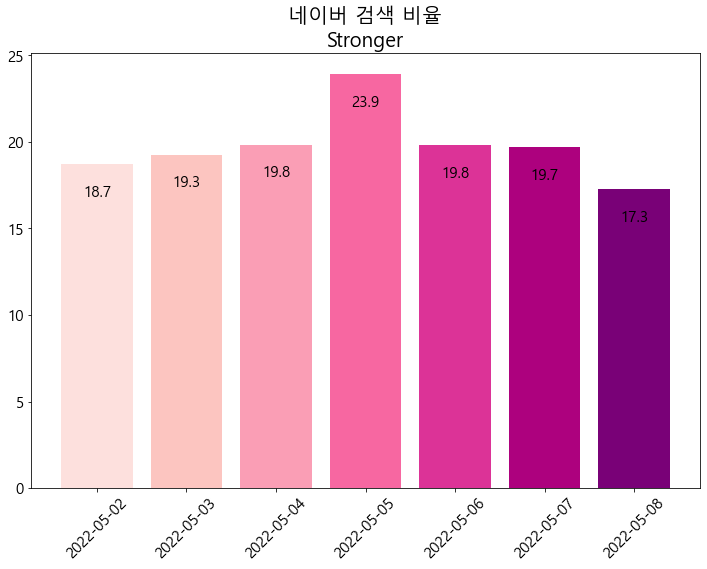

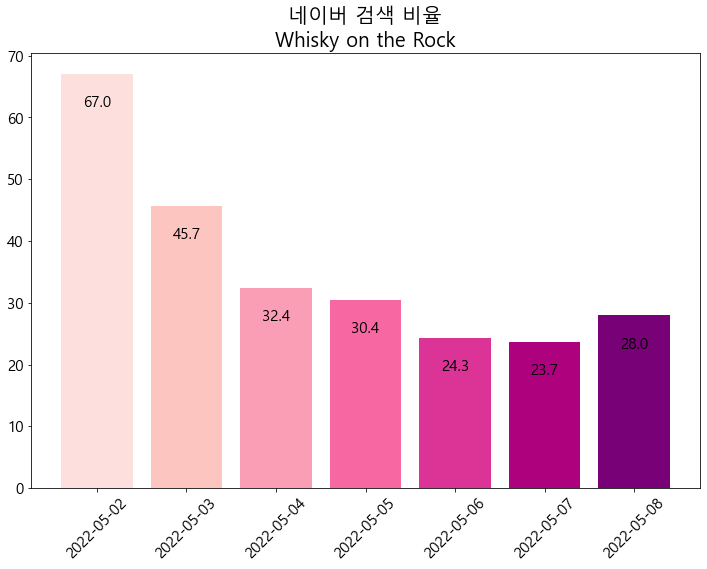

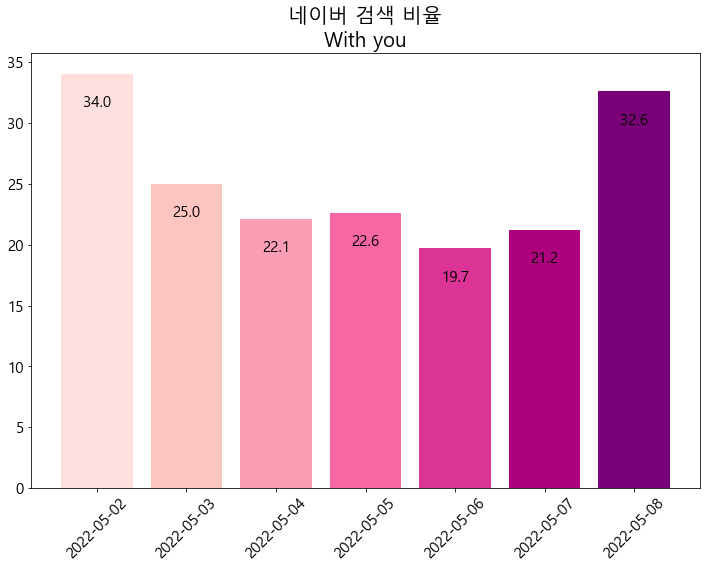

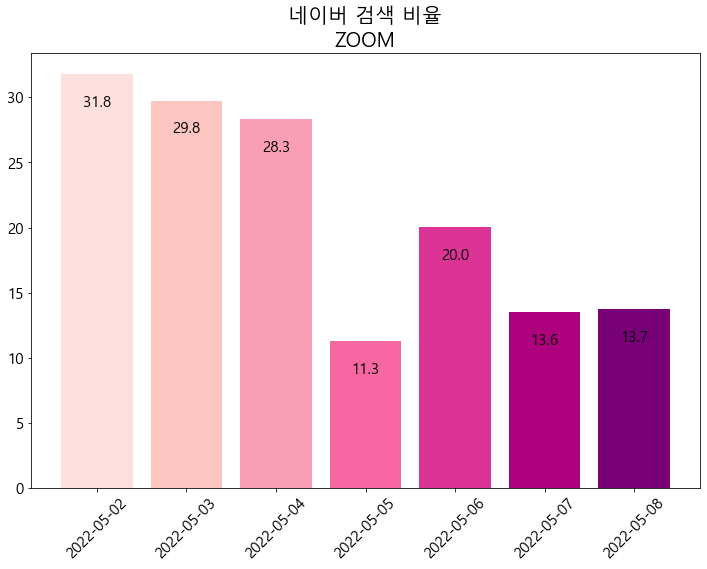

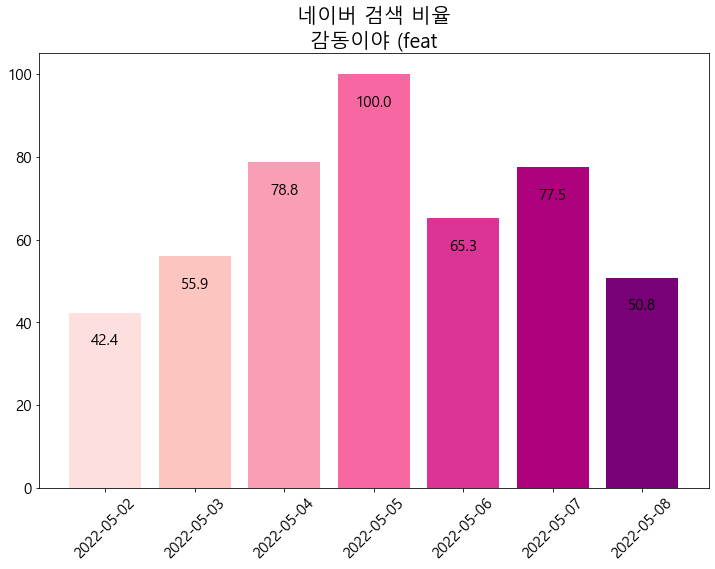

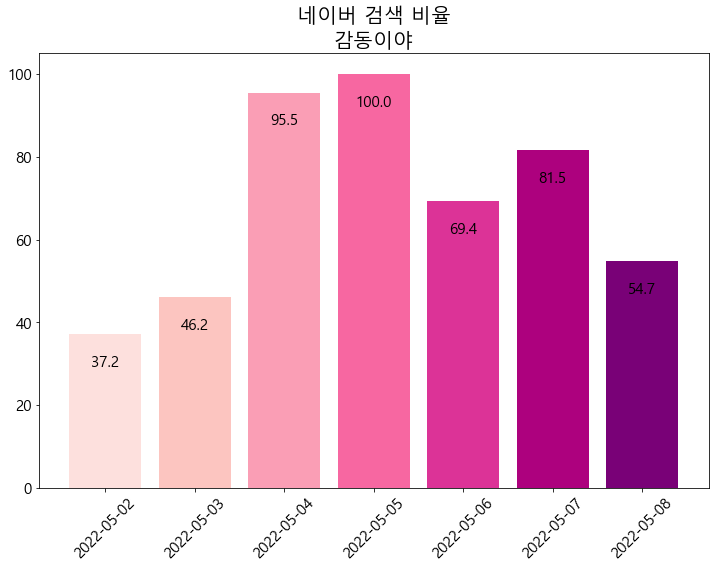

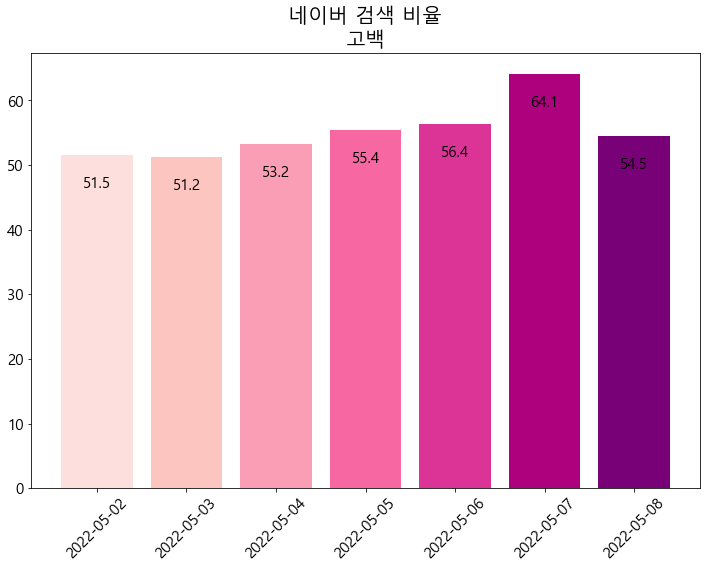

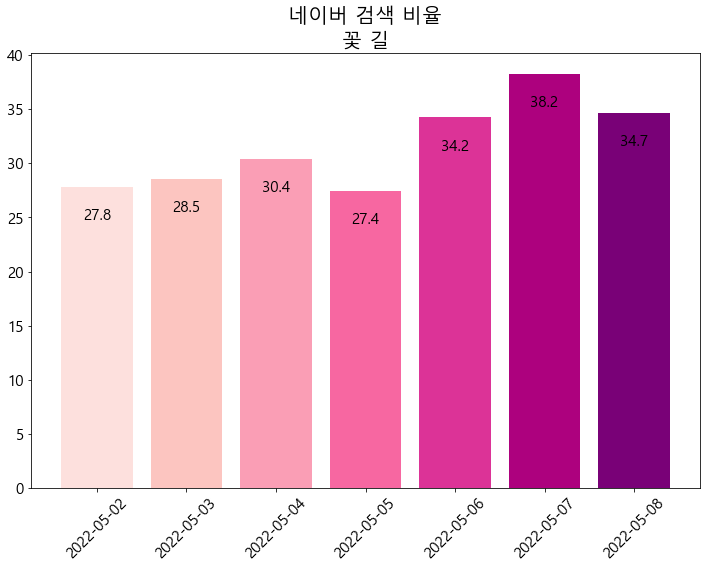

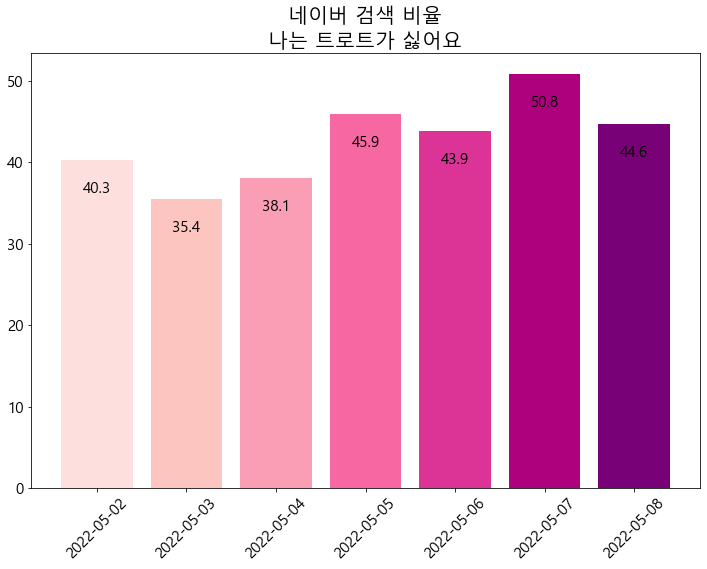

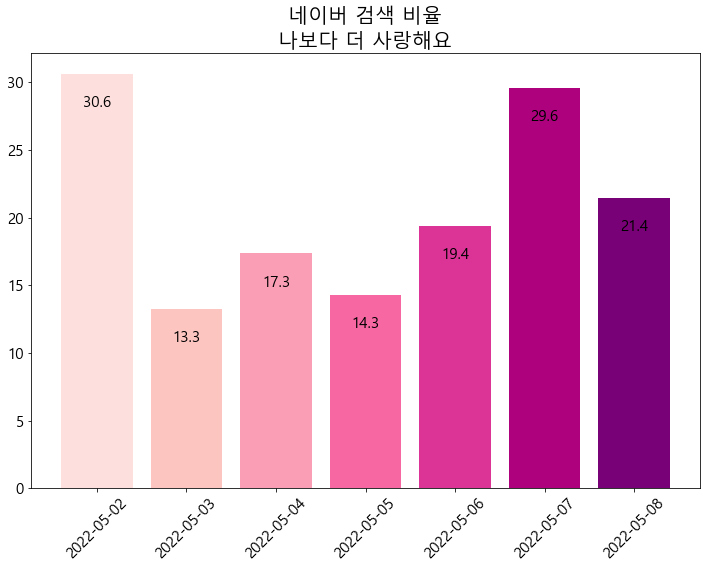

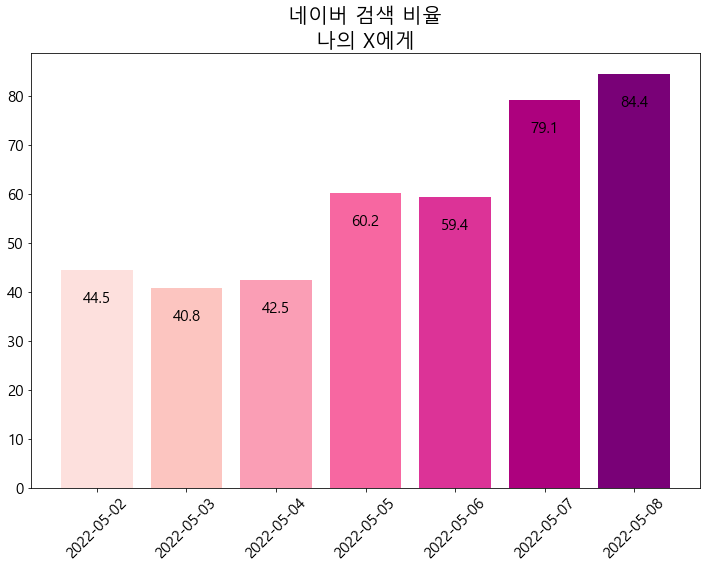

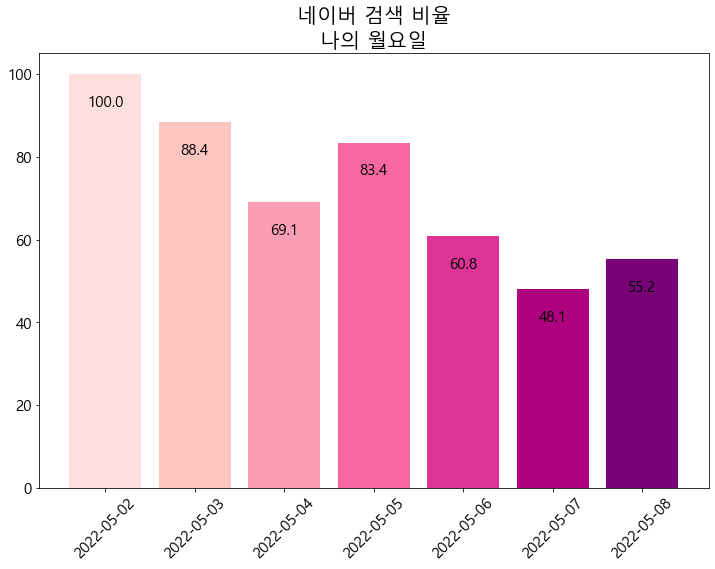

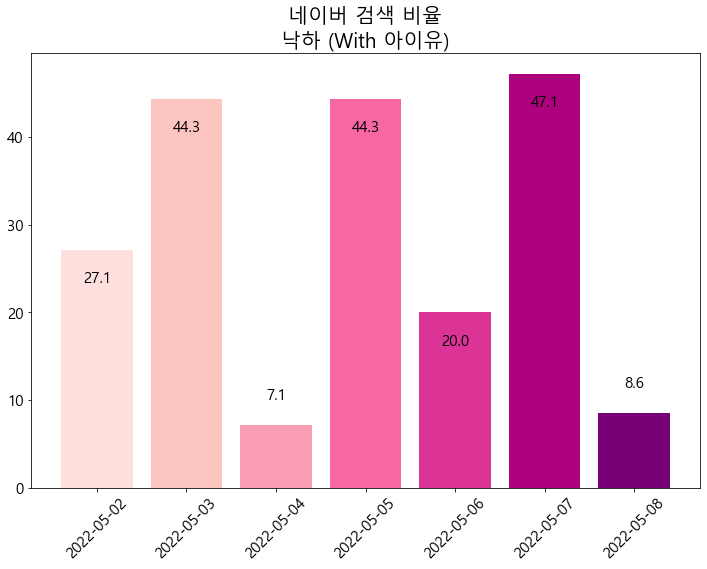

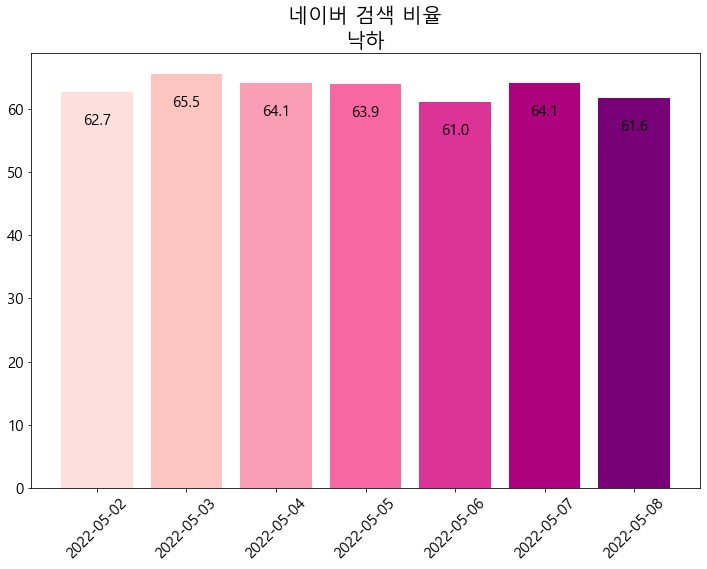

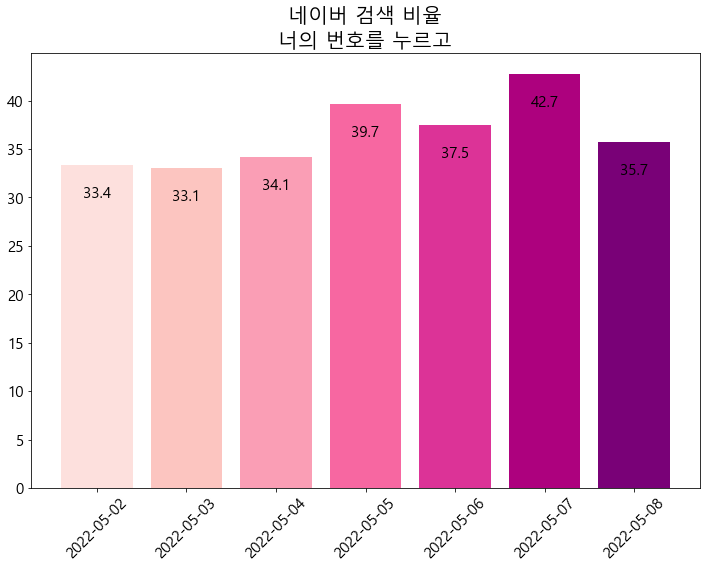

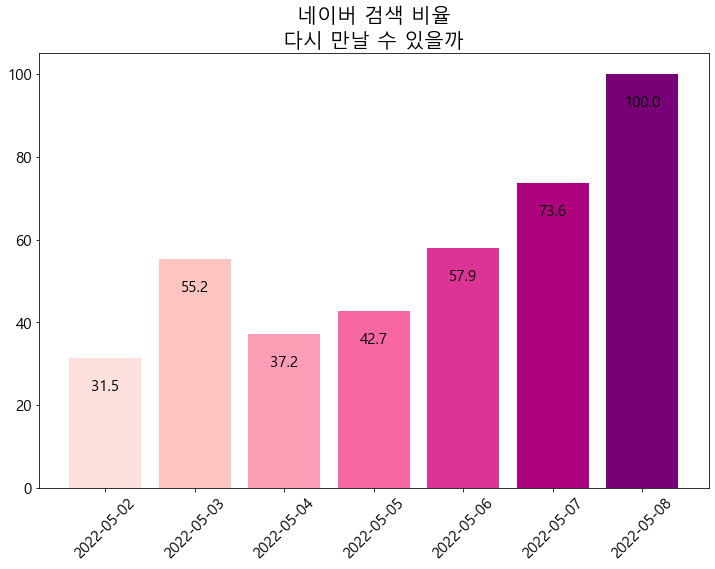

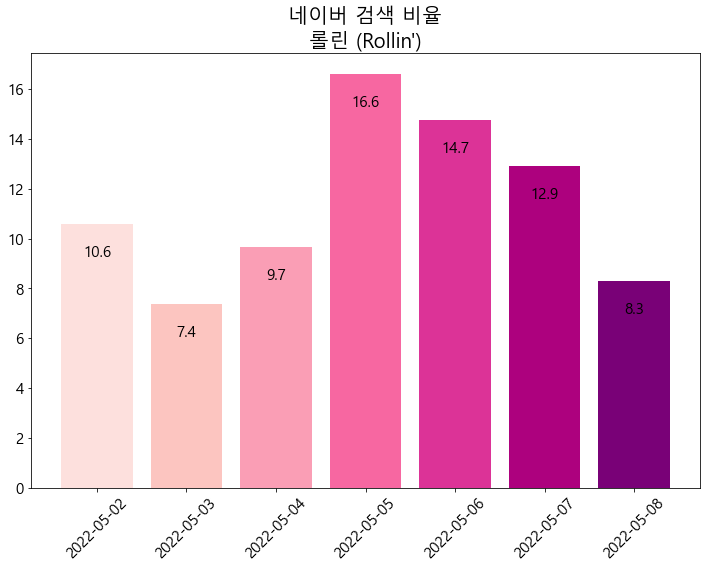

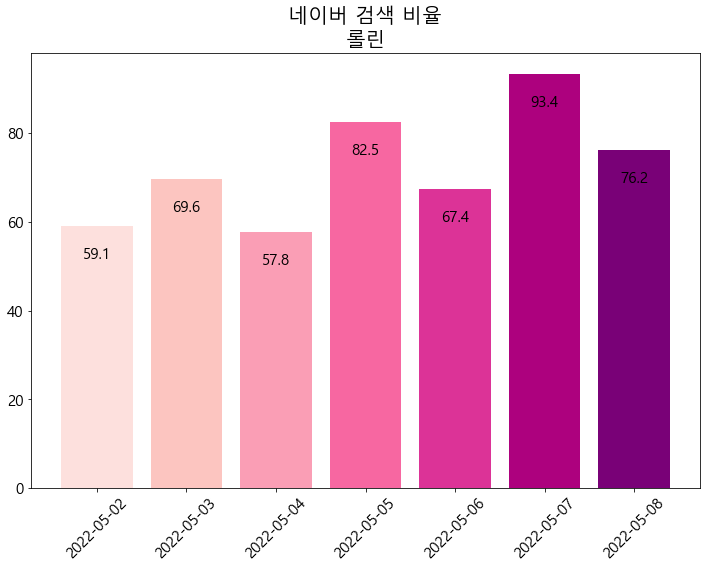

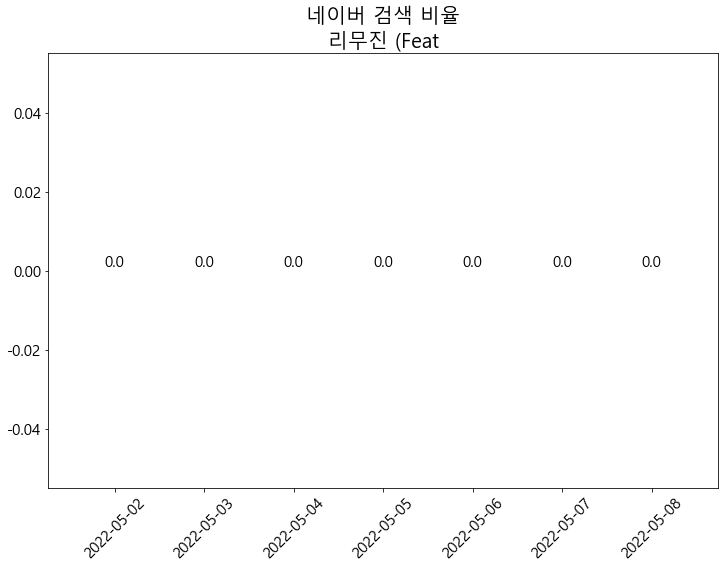

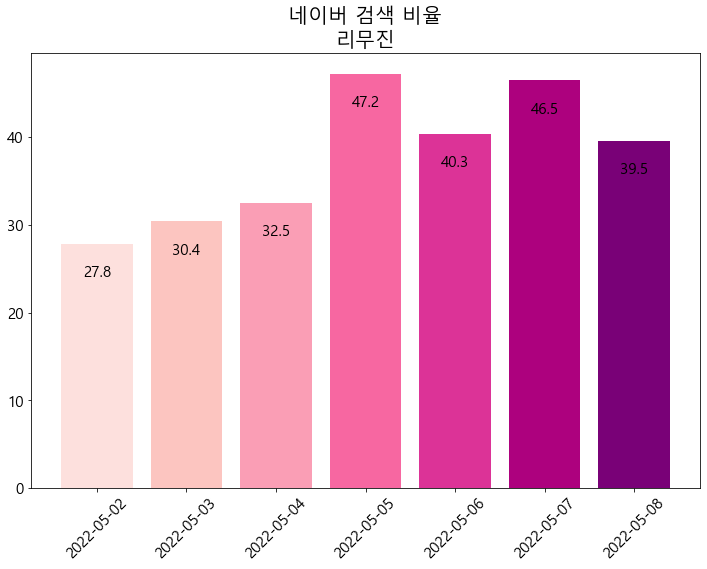

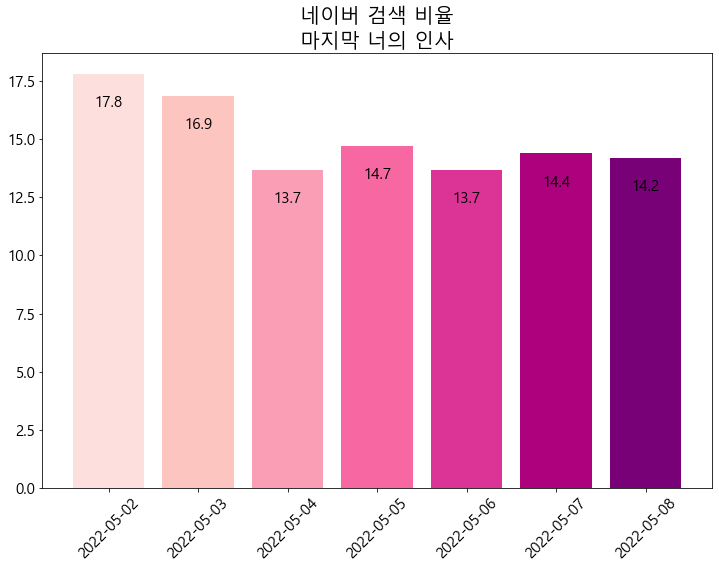

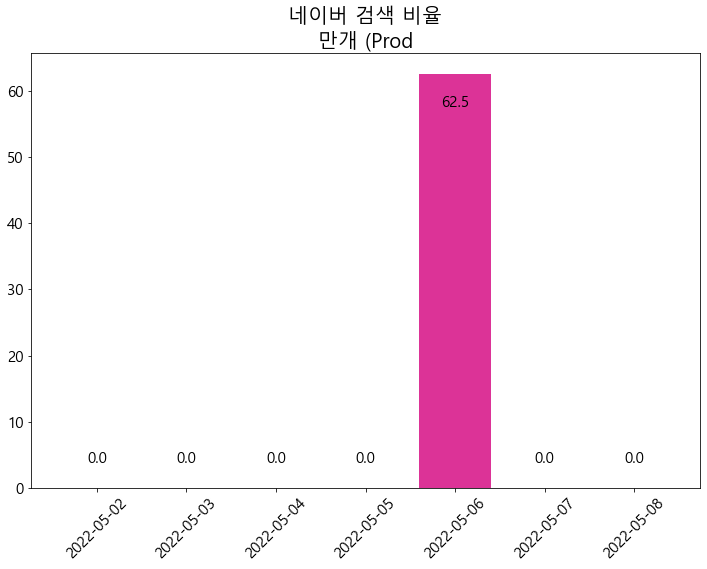

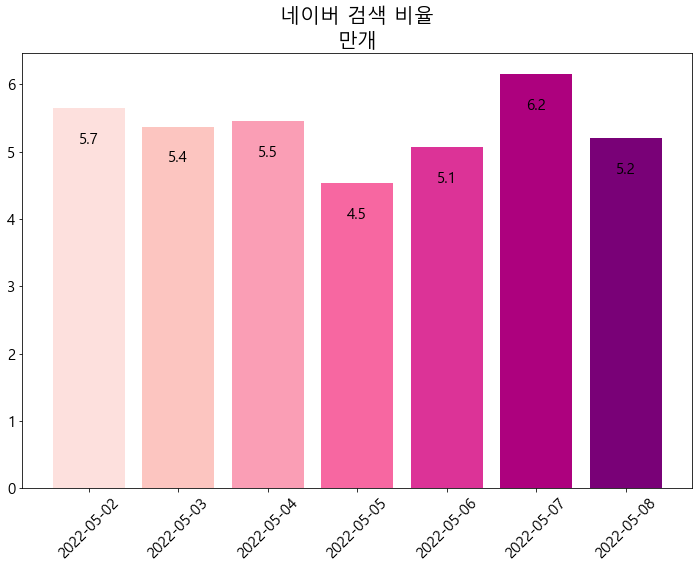

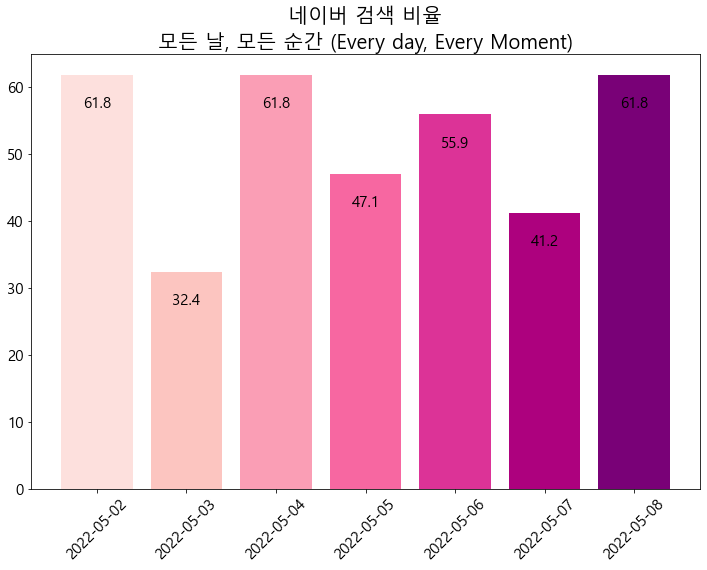

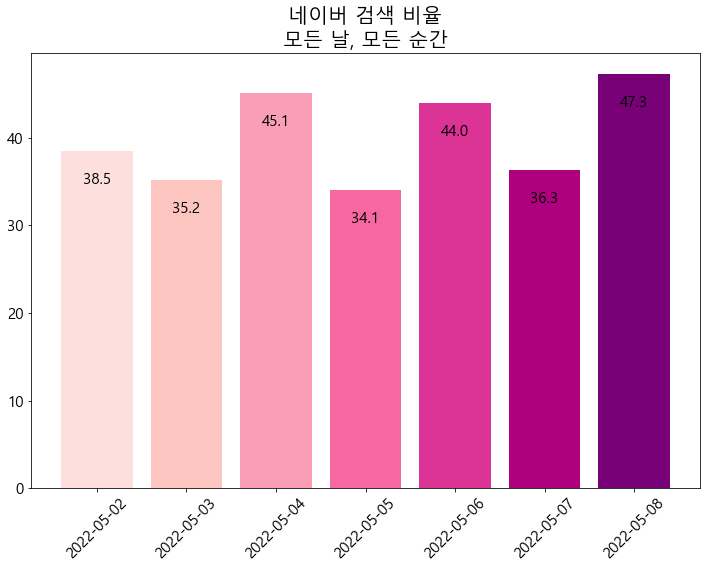

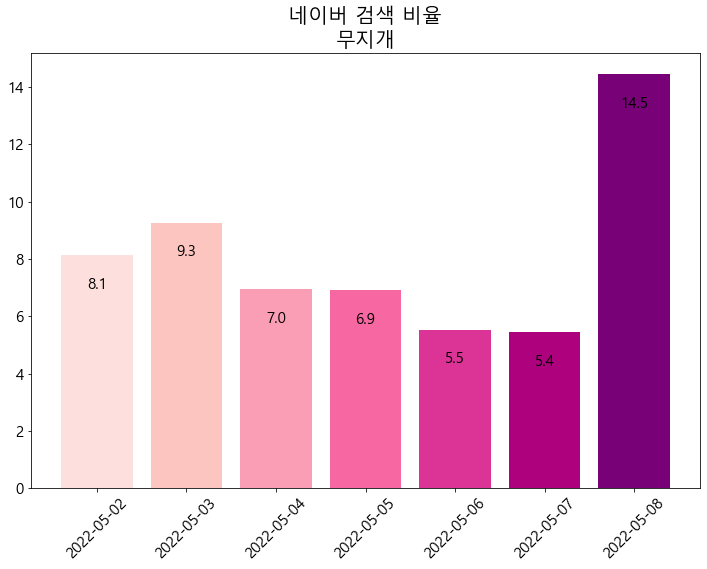

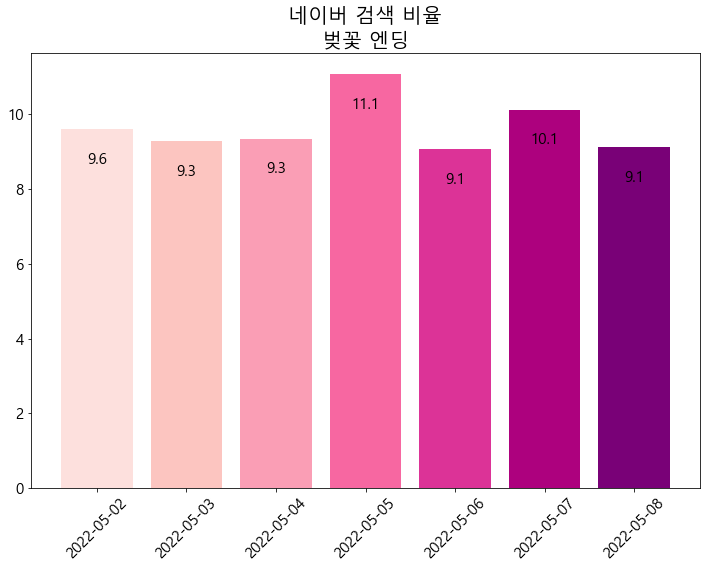

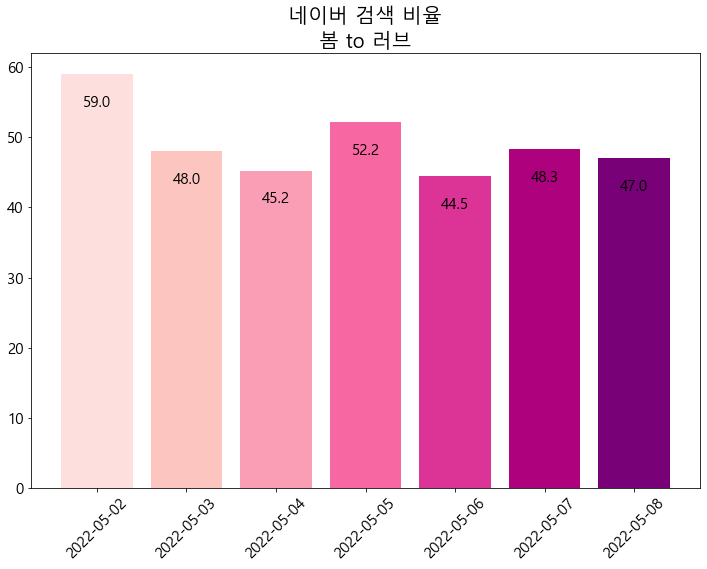

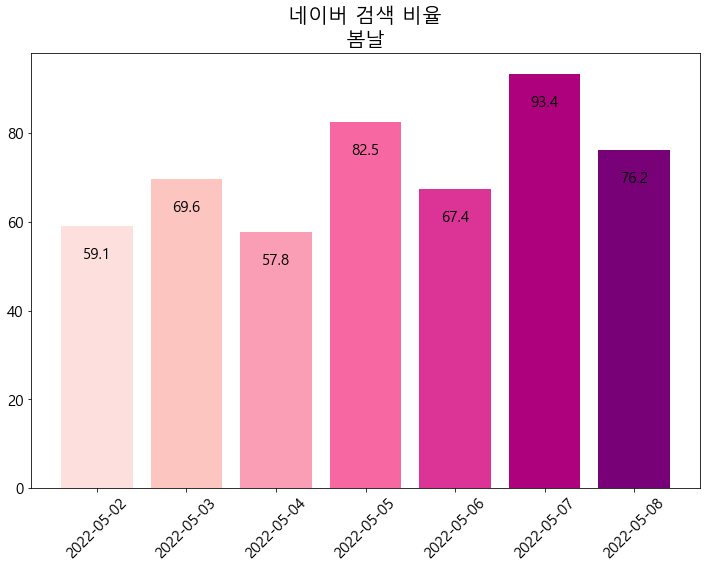

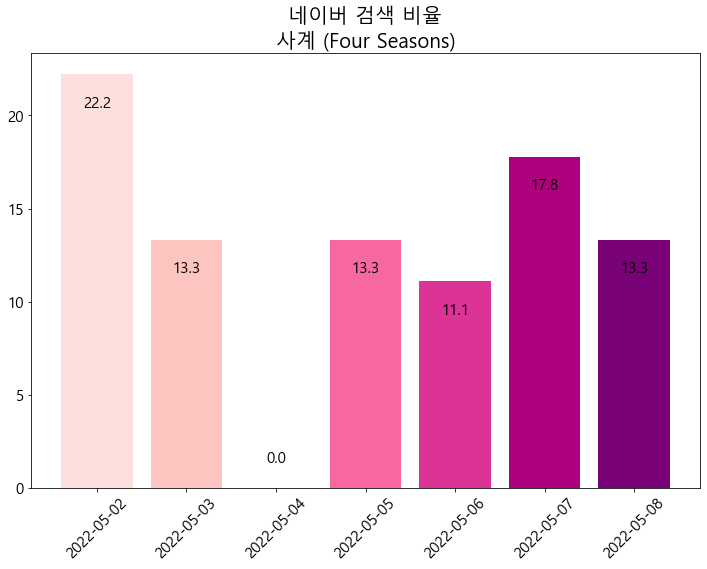

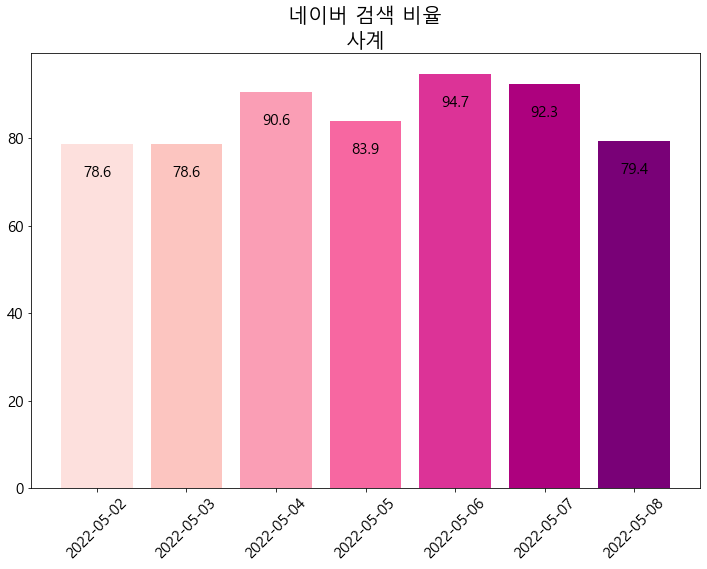

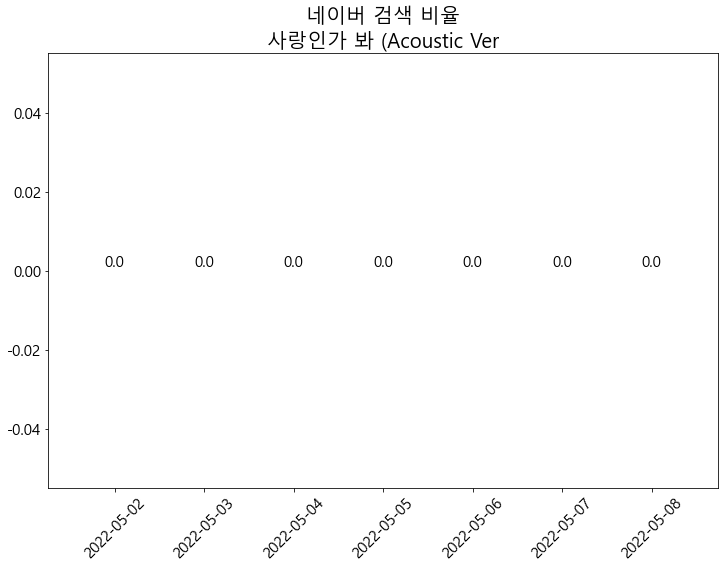

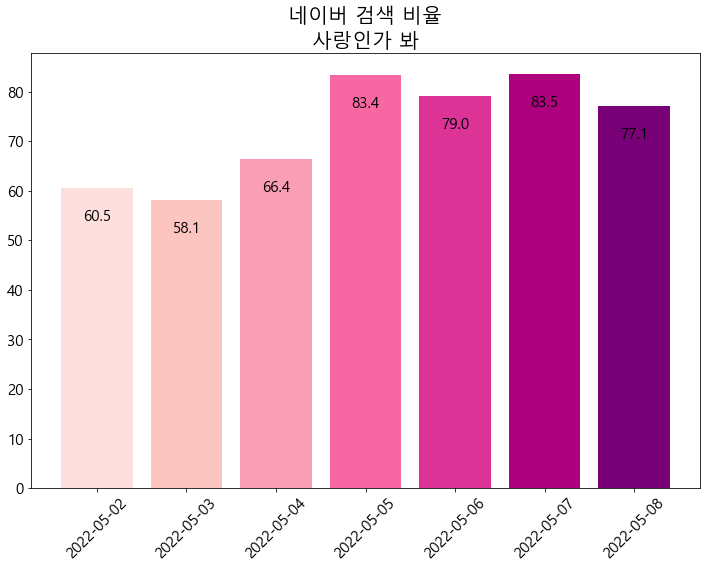

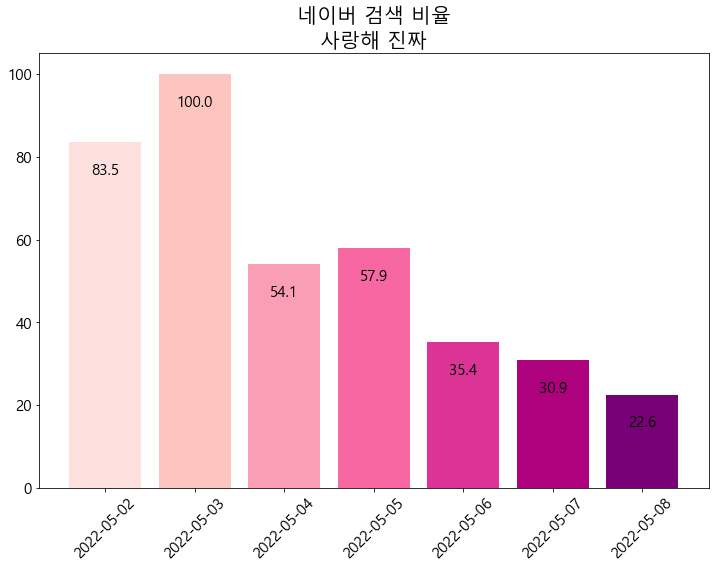

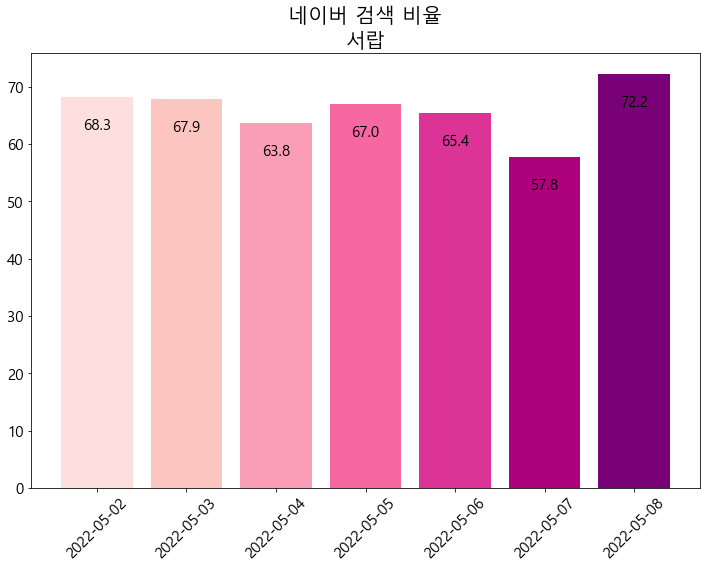

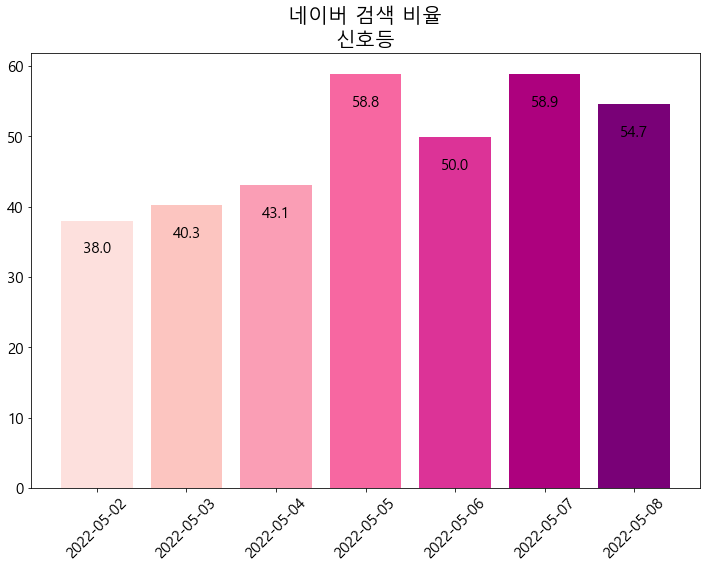

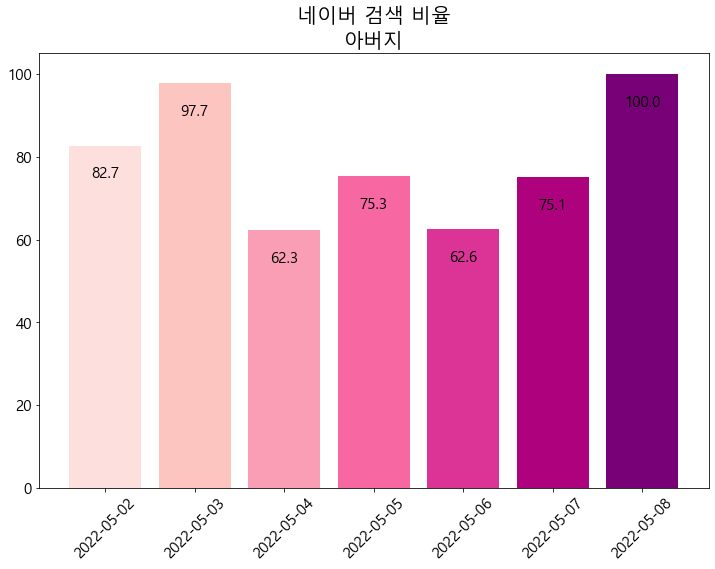

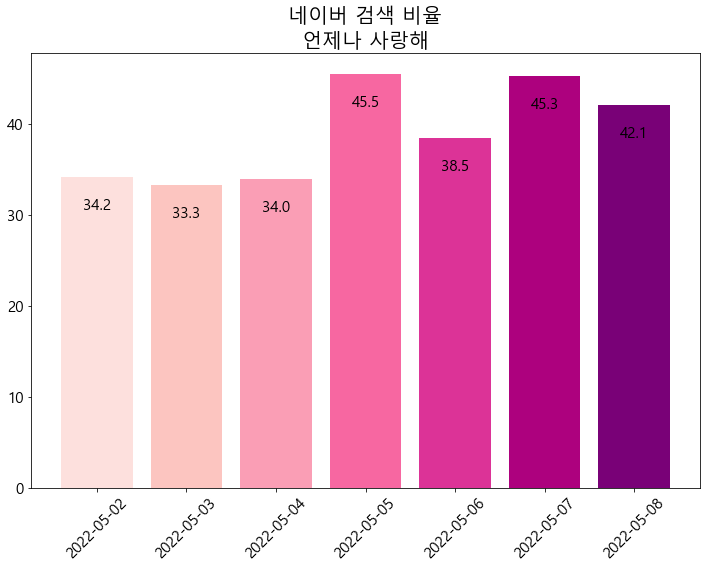

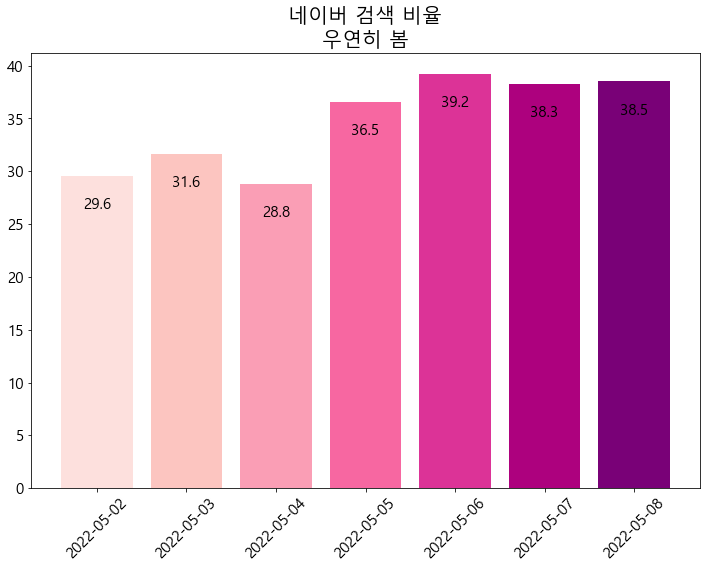

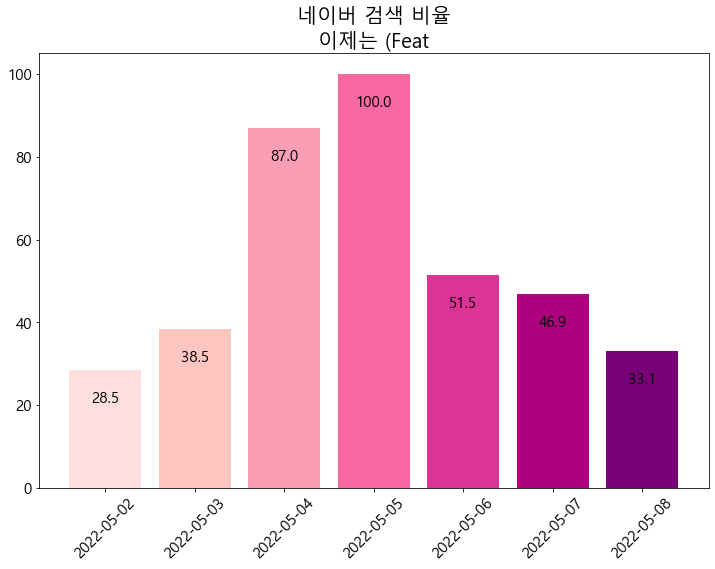

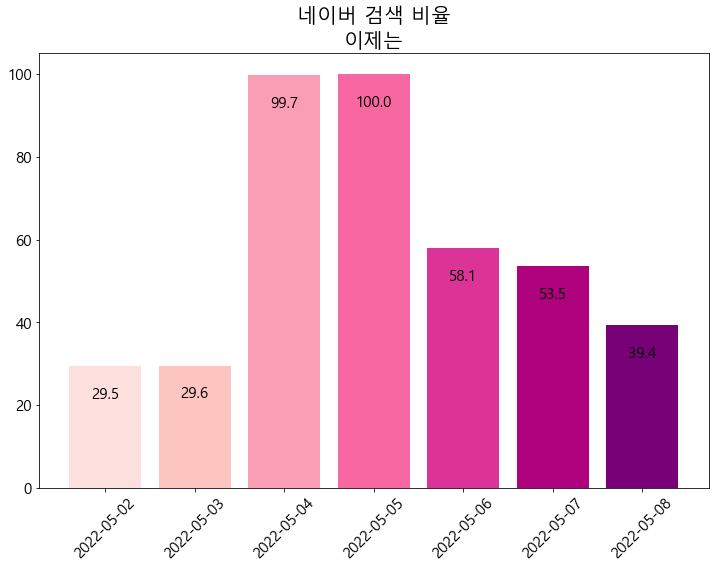

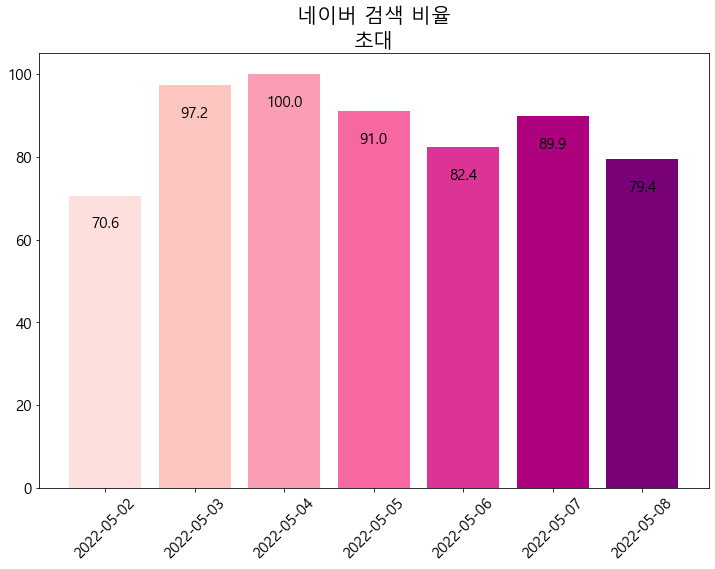

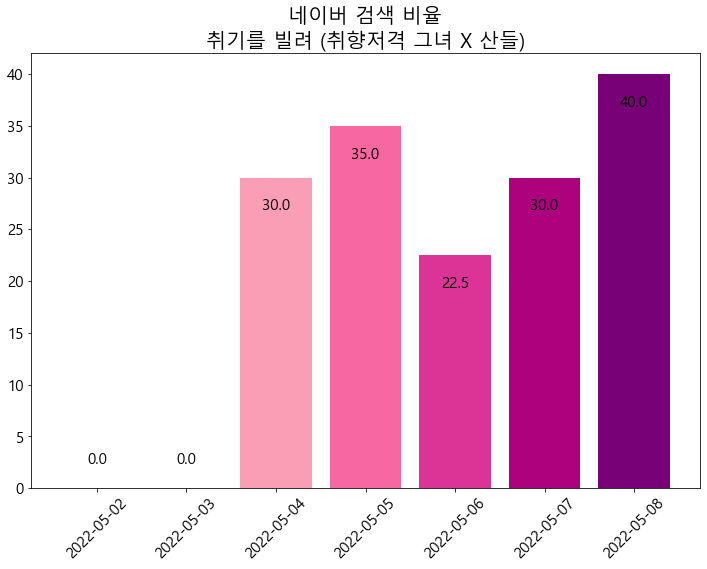

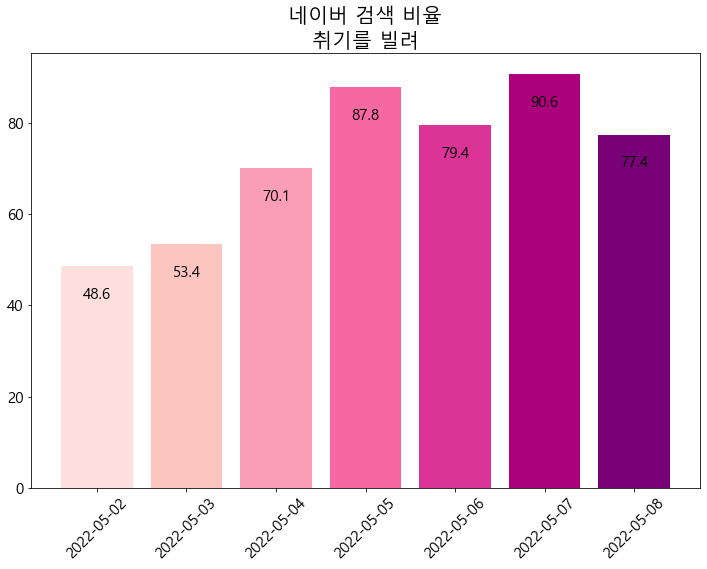

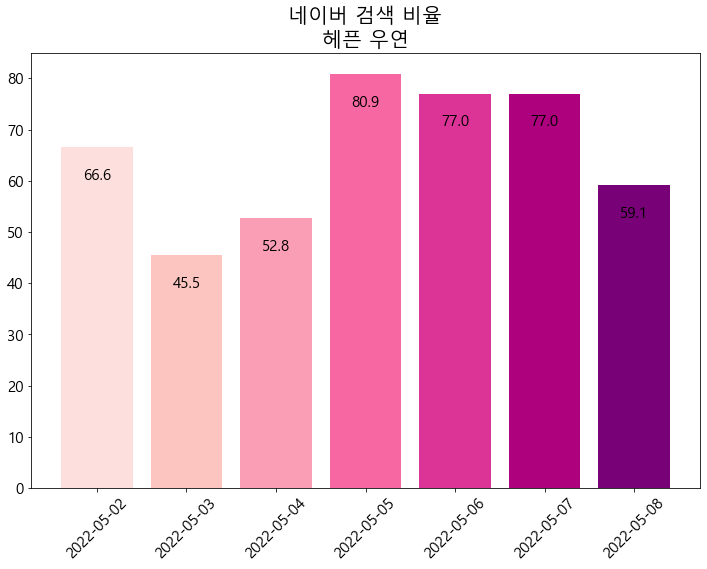

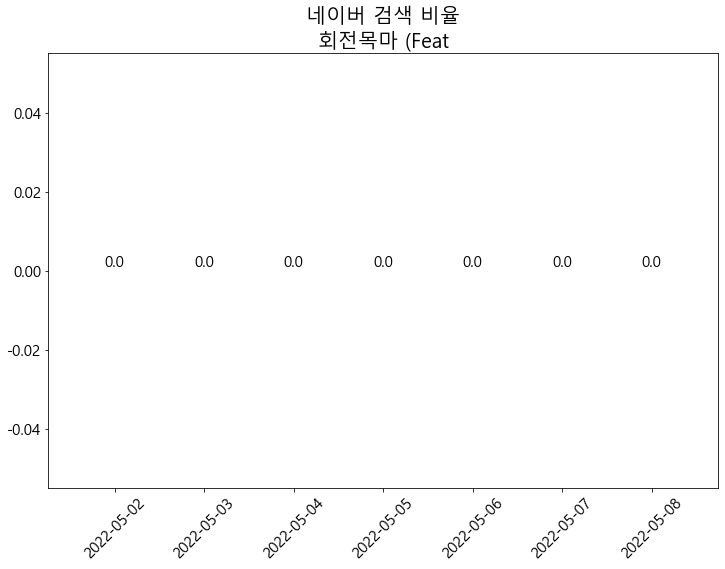

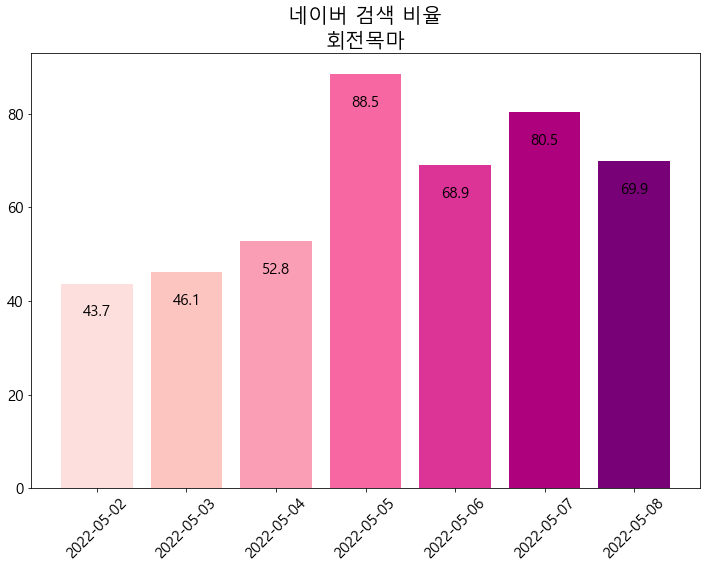

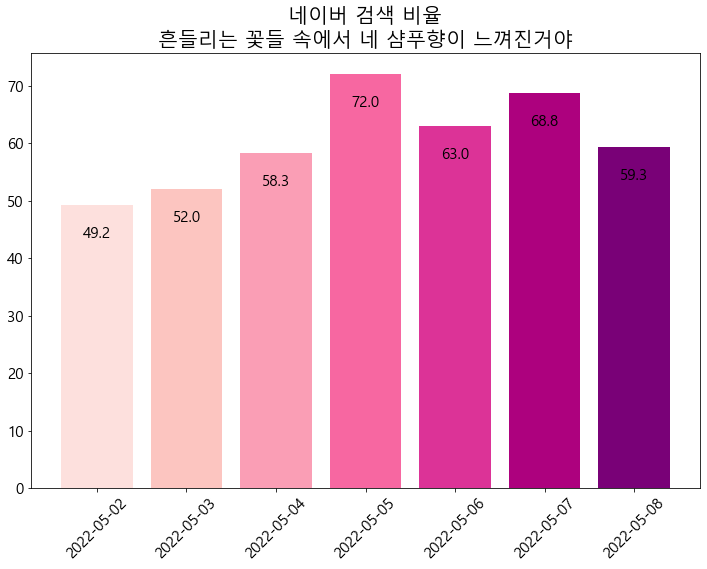

In [67]:
for one in file_list:
    print(one)
    title = one.split('.')[0]
    naver_df = pd.read_excel(one)
    df = naver_df[ (naver_df['url'] >= '2022-05-02') & (naver_df['url'] <= '2022-05-08')].reset_index(drop=True)
    df.columns = ['날짜', '검색비율']
    df['검색비율'] = df['검색비율'].astype(float)

    colors = sns.color_palette('RdPu', df.shape[0])
    x = df['날짜']
    y = df['검색비율']
    plt.figure( figsize=(12,8) )
    plt.bar(x, y, color=colors)
    plt.title(f"네이버 검색 비율\n{title}", fontsize=20)
    plt.xticks(fontsize=15,rotation=45)
    plt.yticks( fontsize=15)
    interval_ratio = math.ceil( max(y) )*0.05
    interval_ratio2 = math.ceil( max(y) )*0.2
    for i in range( len(y) ):
            if y[i] <= interval_ratio2:
                plt.text(x[i], y[i]+interval_ratio, round(y[i],1), fontsize=15, color='black',
                        horizontalalignment='center',
                        verticalalignment='bottom')
            else:
                plt.text(x[i], y[i]-interval_ratio, round(y[i],1), fontsize=15, color='black',
                        horizontalalignment='center',
                        verticalalignment='top')
    plt.savefig(f"{title}.png")

## 이전 그래프

C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains

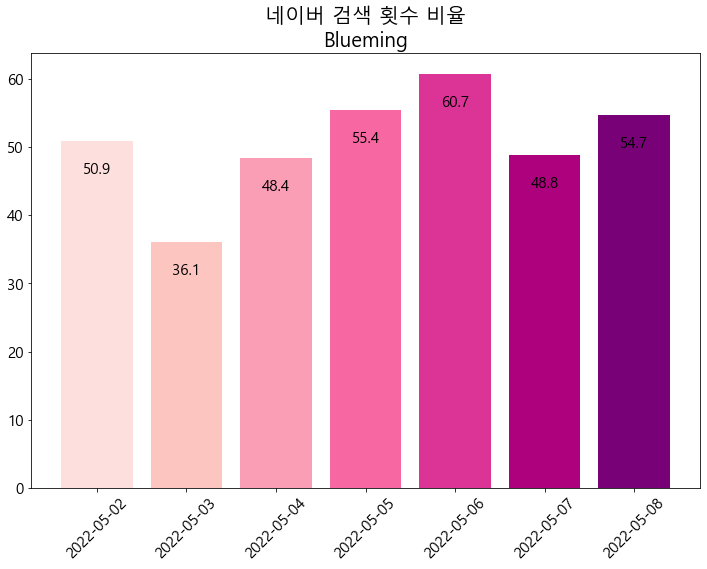

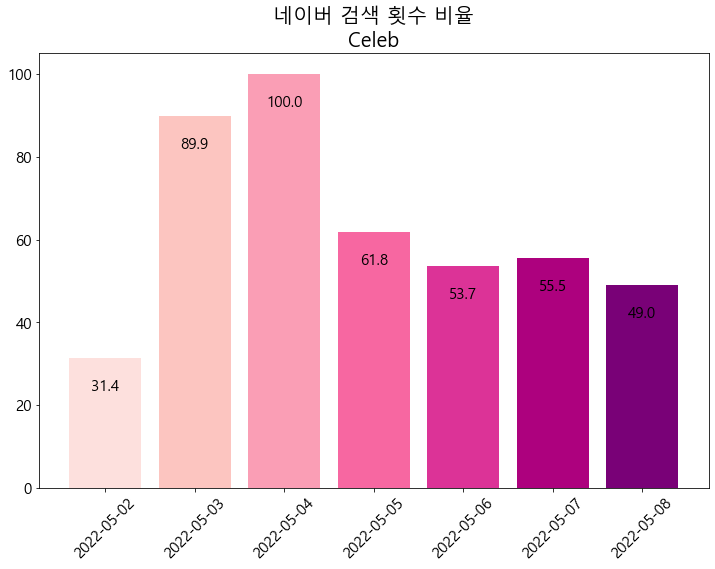

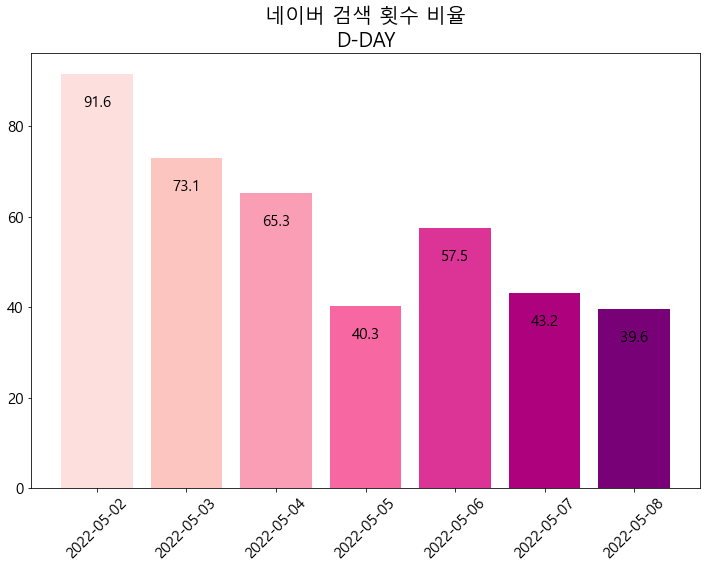

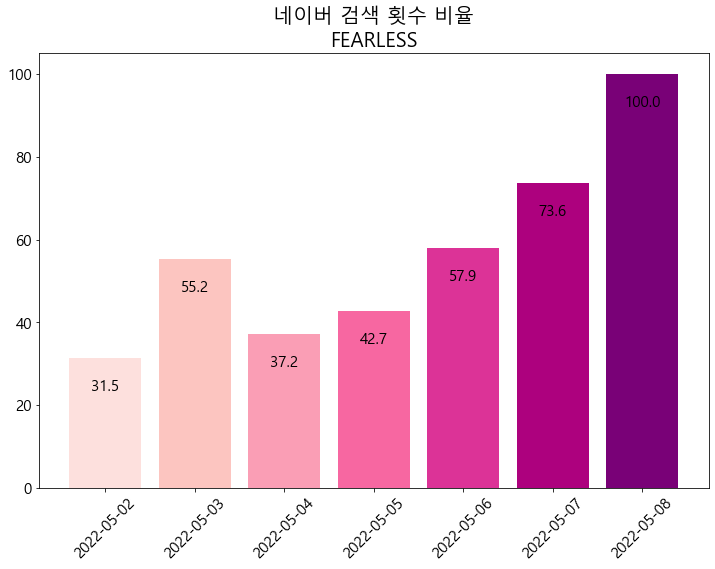

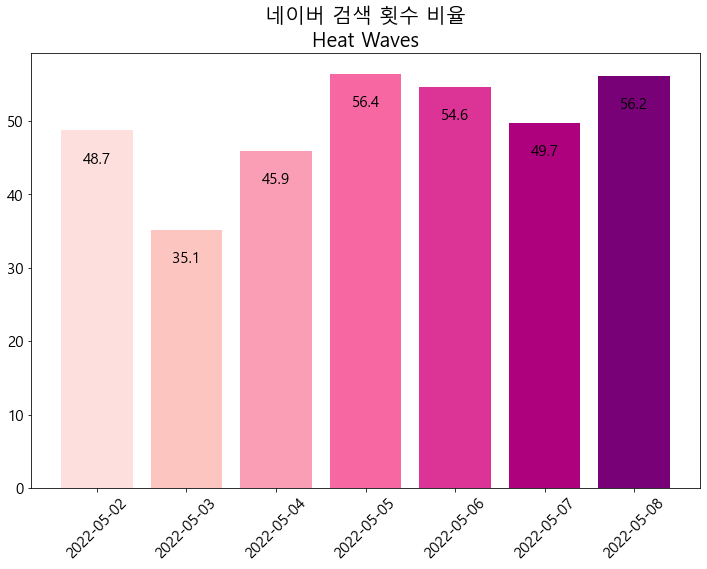

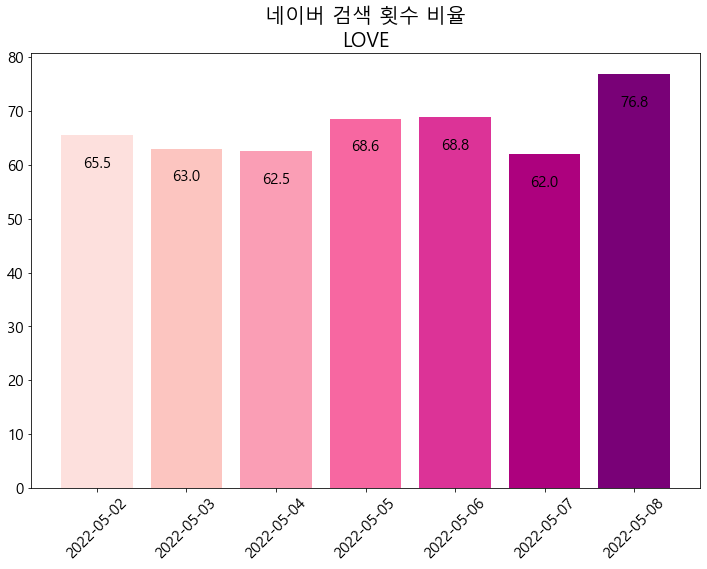

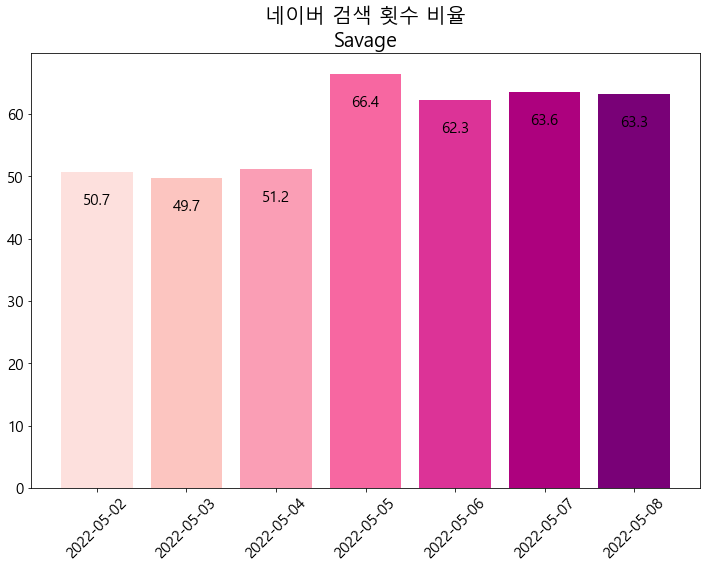

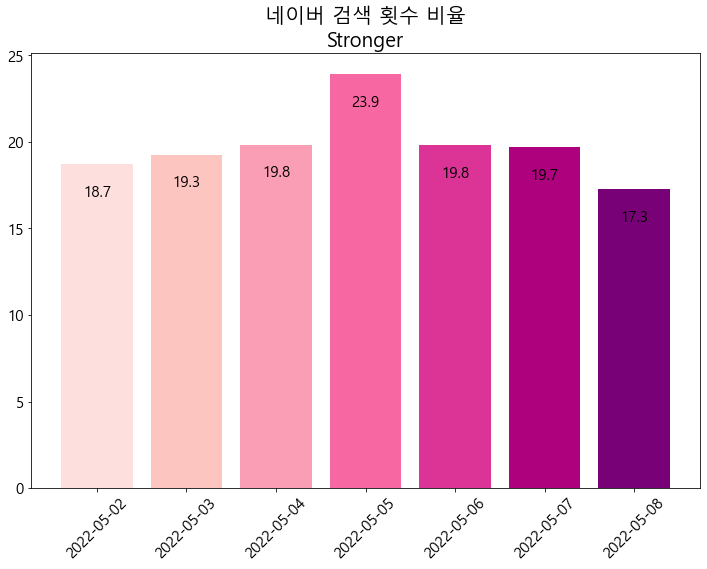

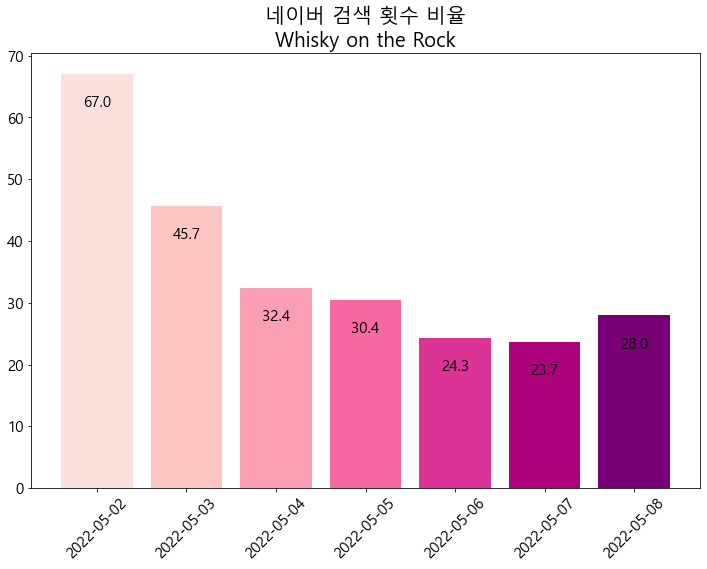

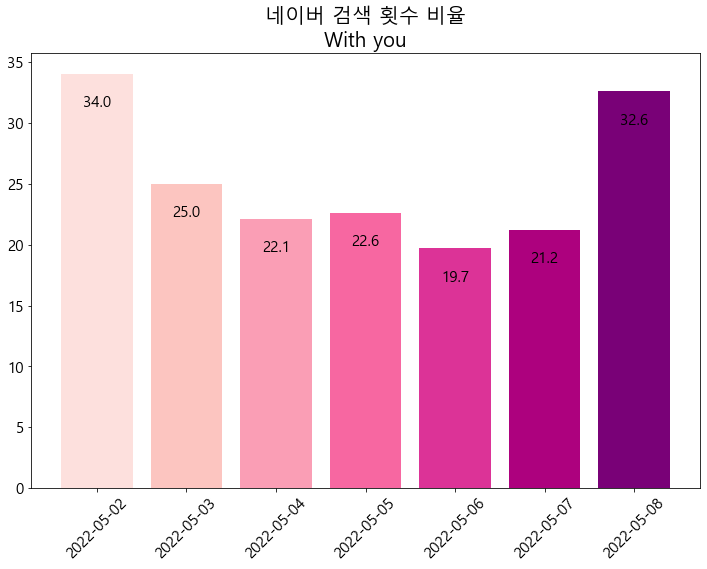

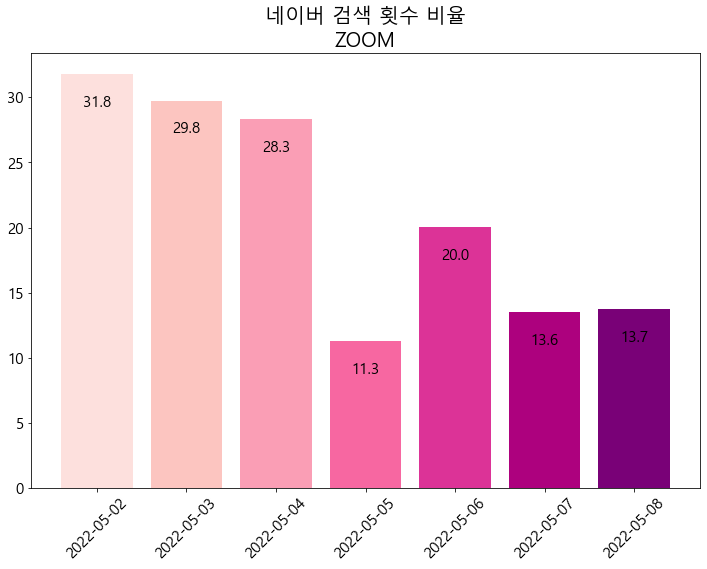

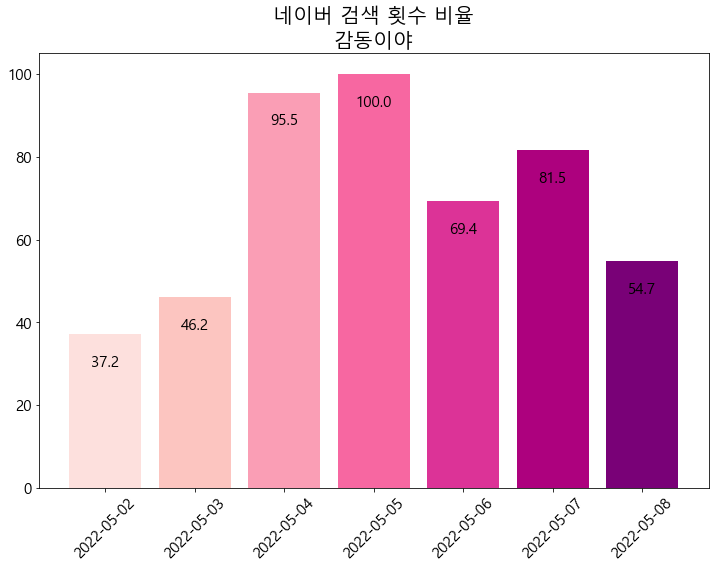

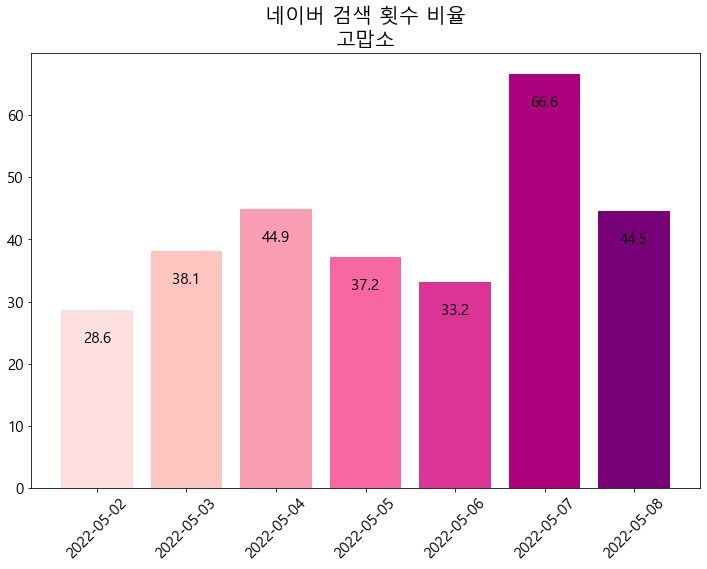

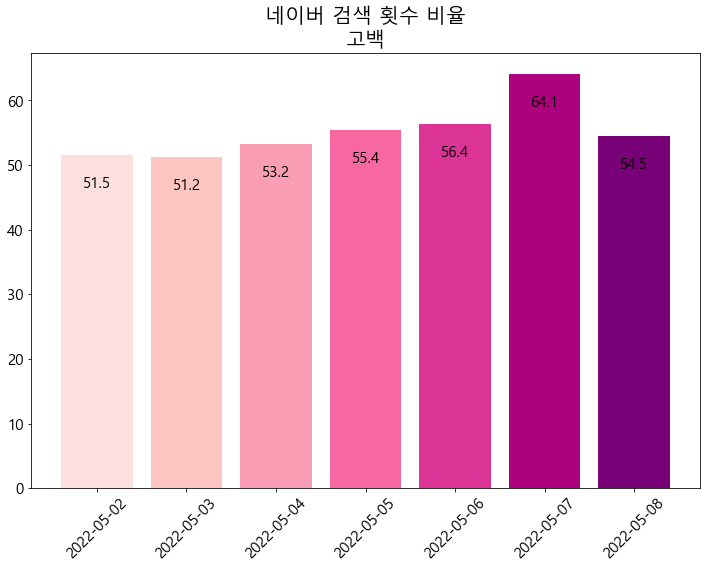

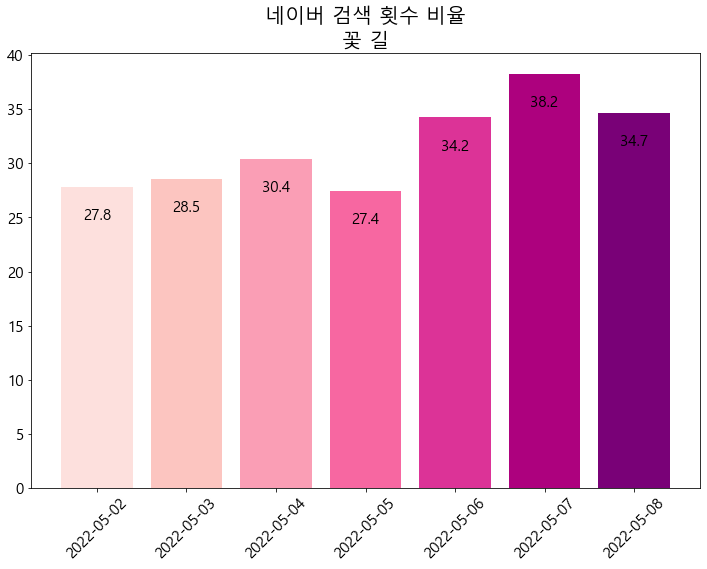

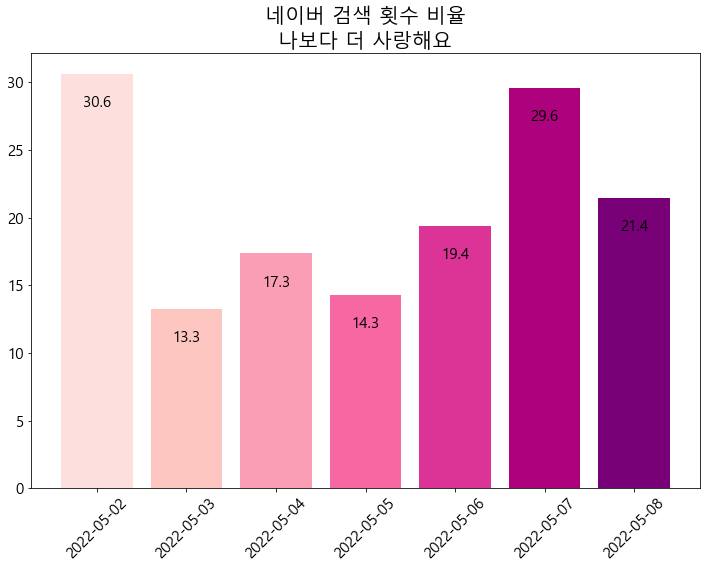

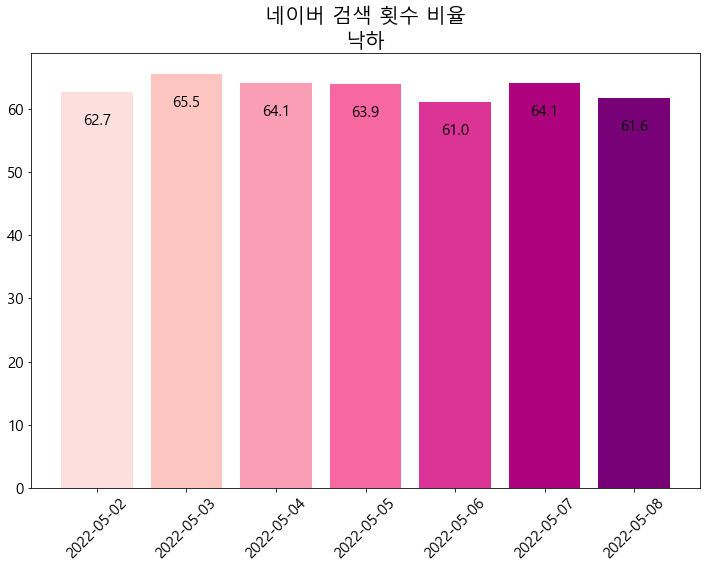

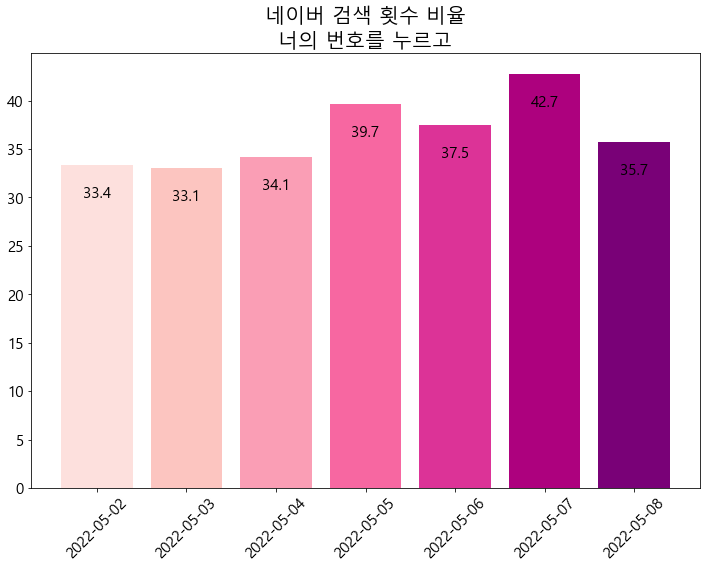

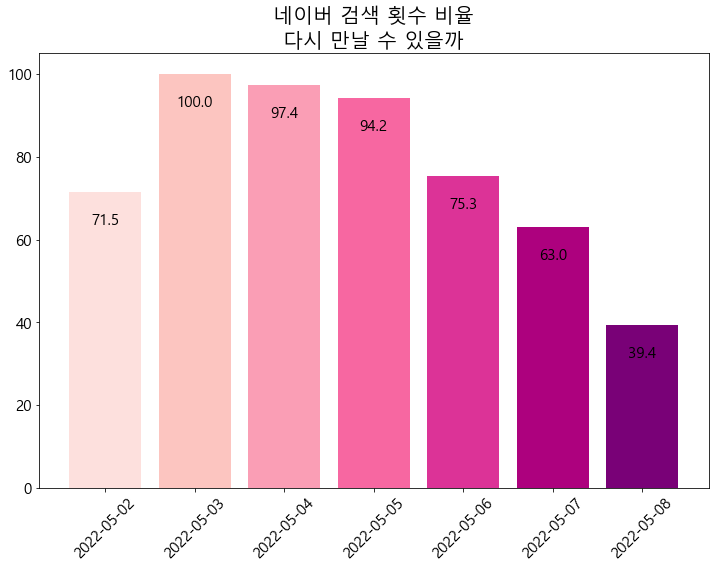

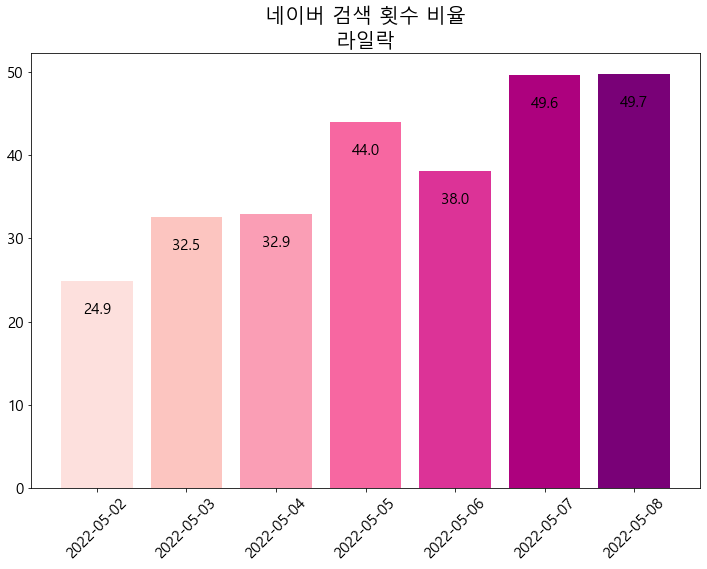

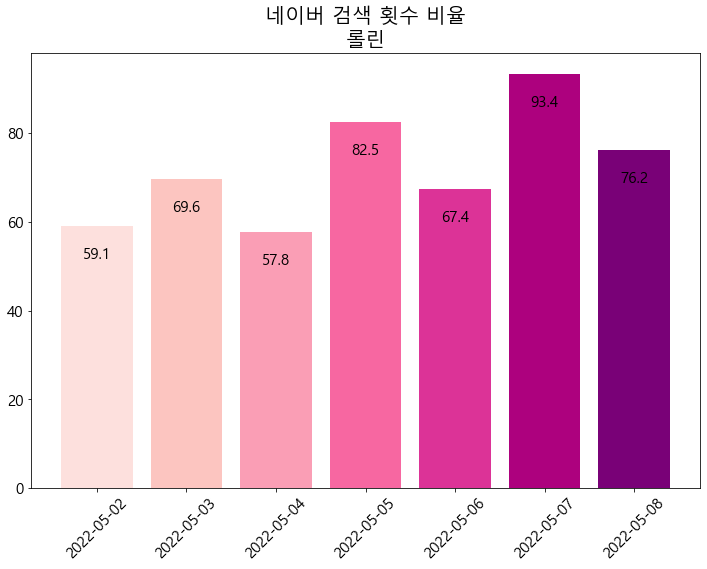

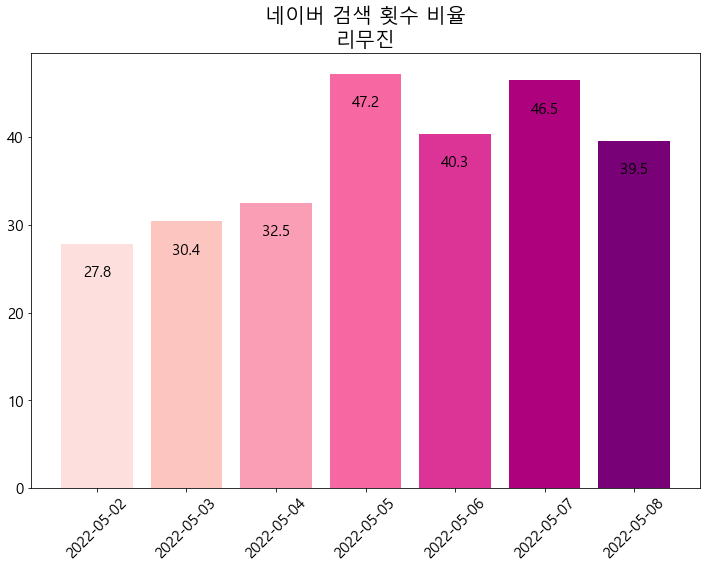

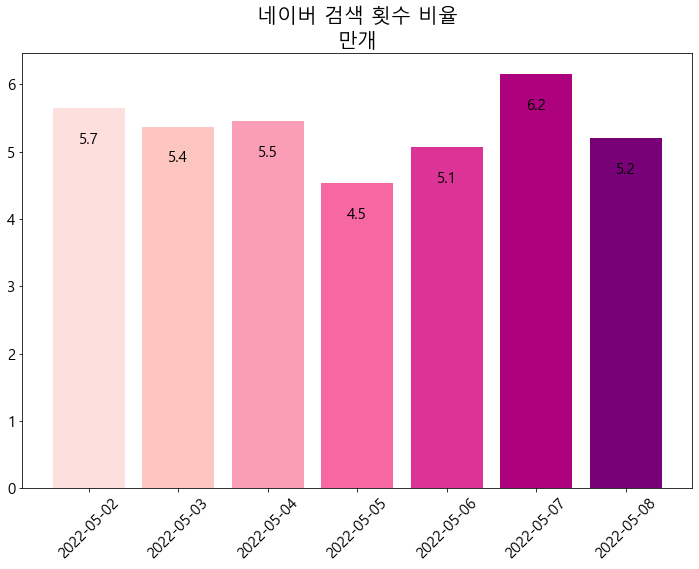

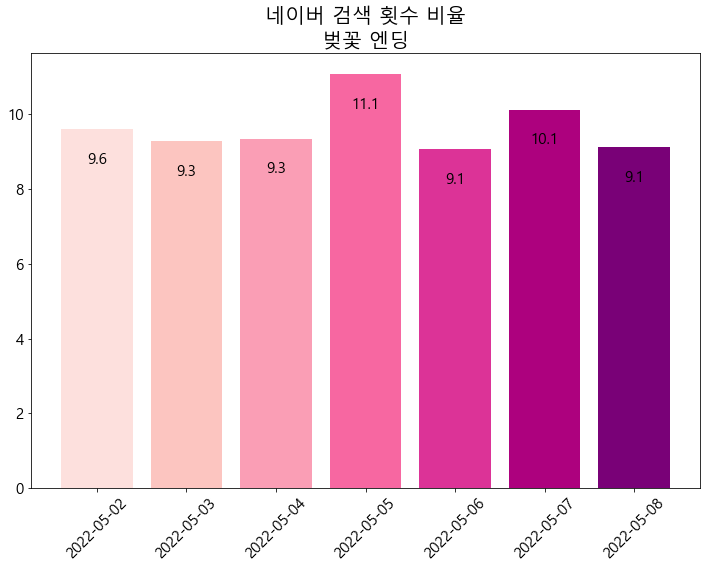

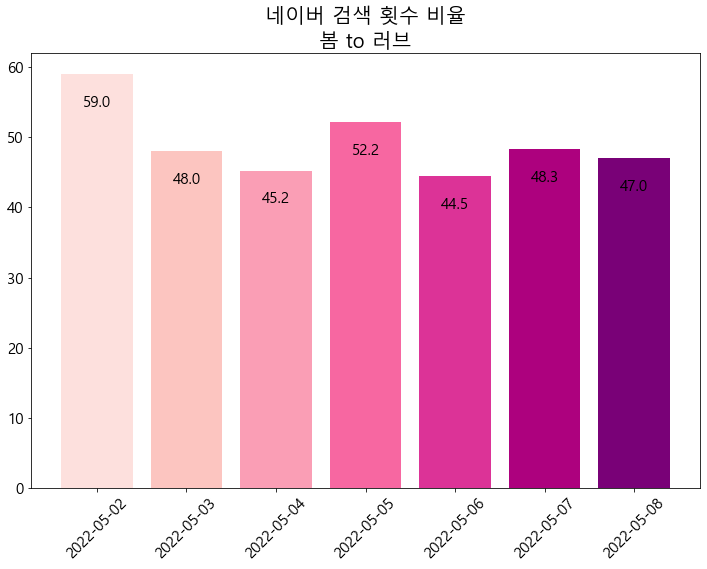

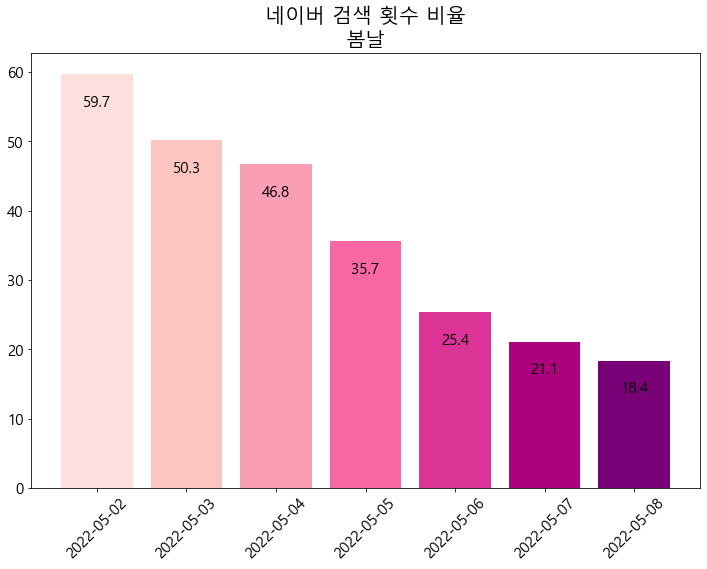

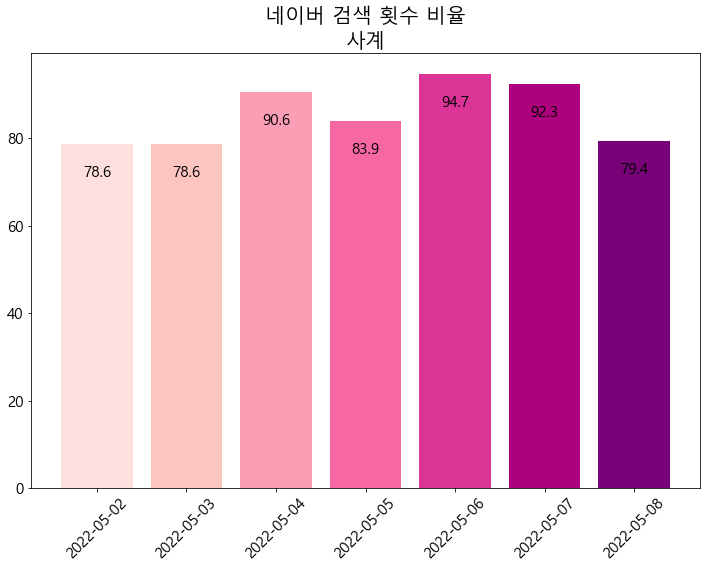

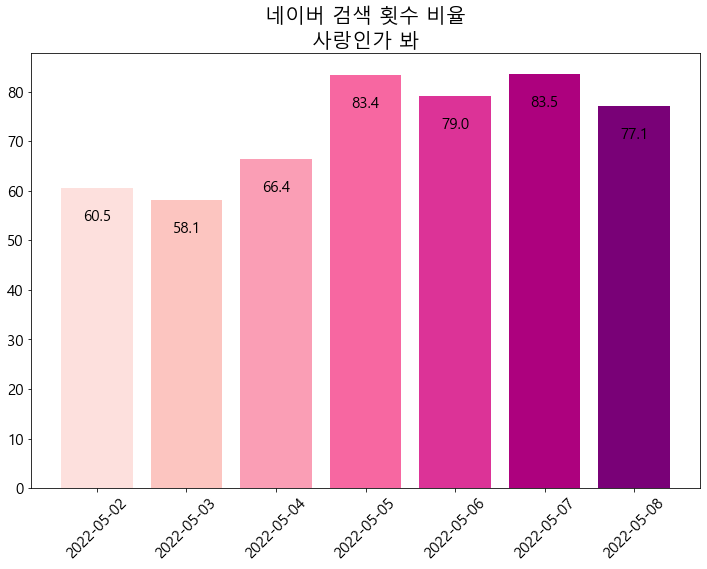

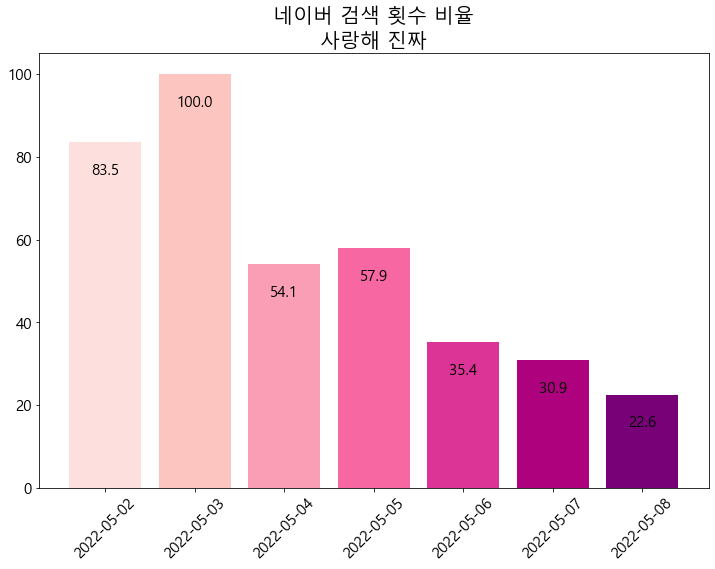

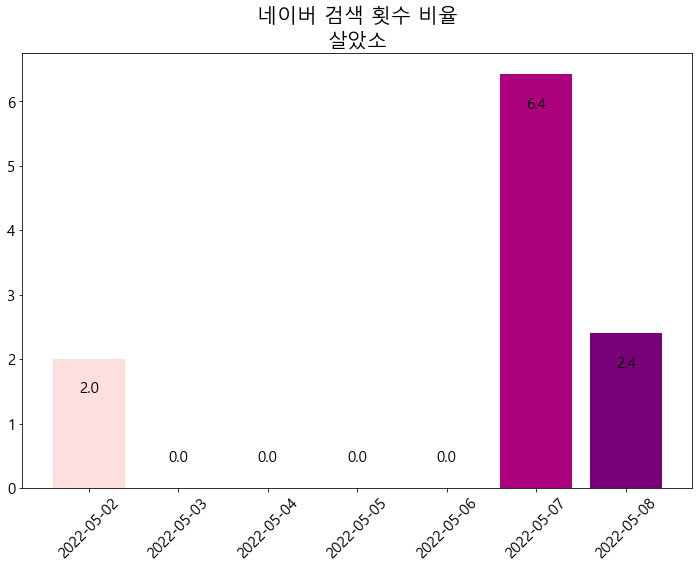

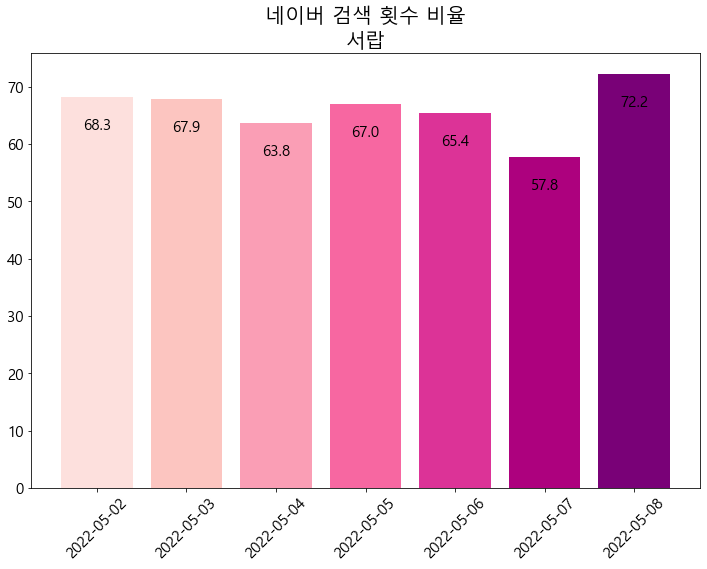

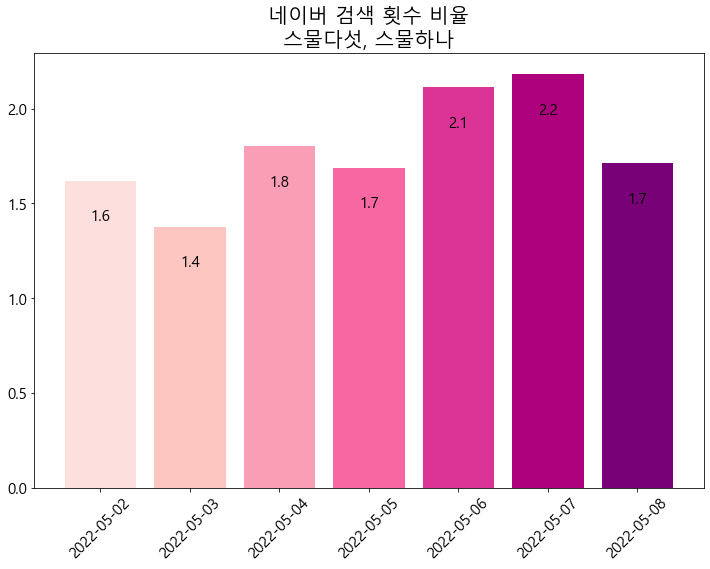

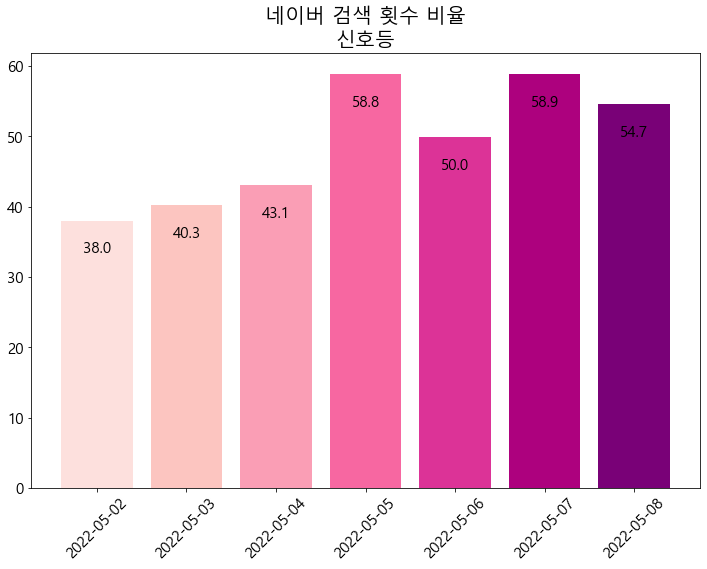

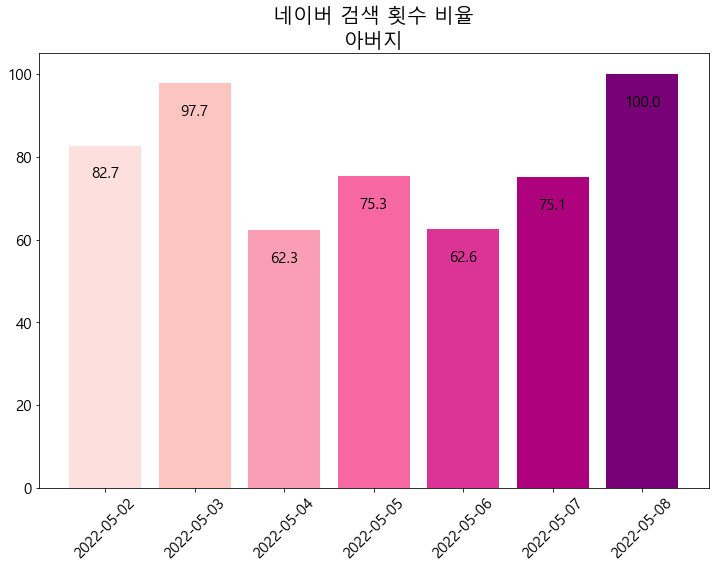

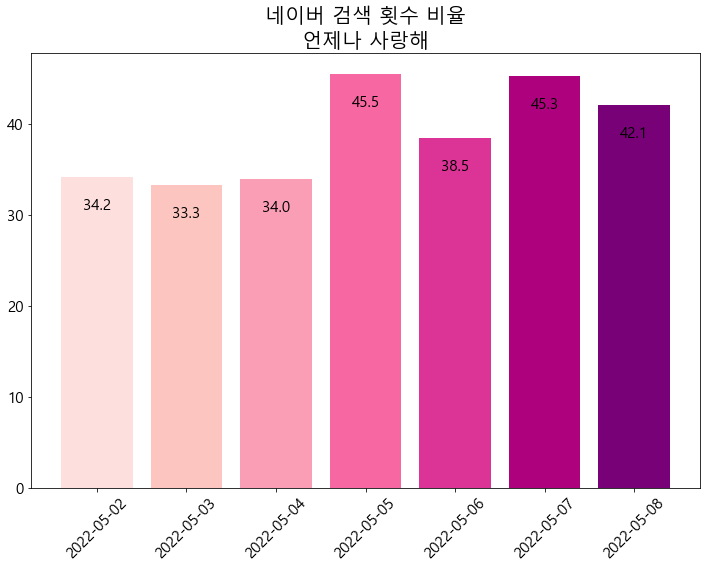

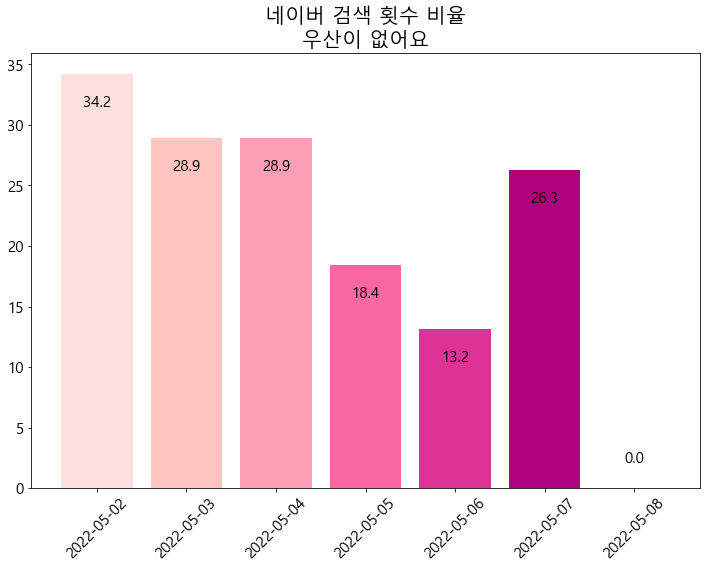

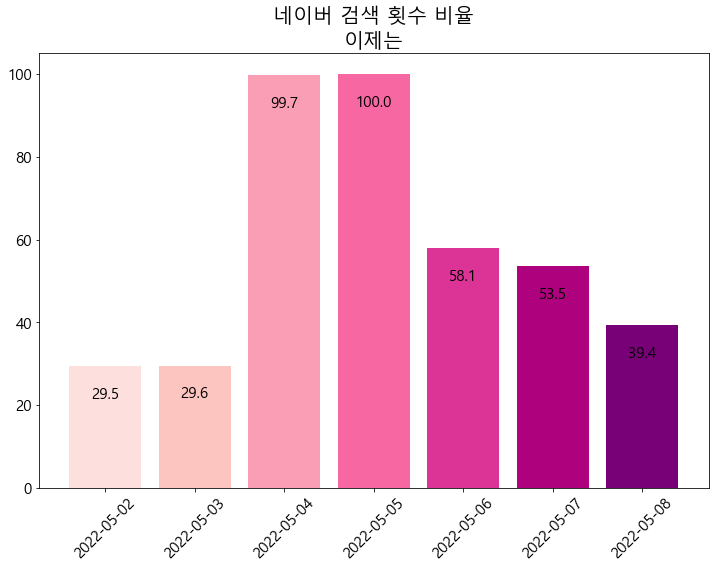

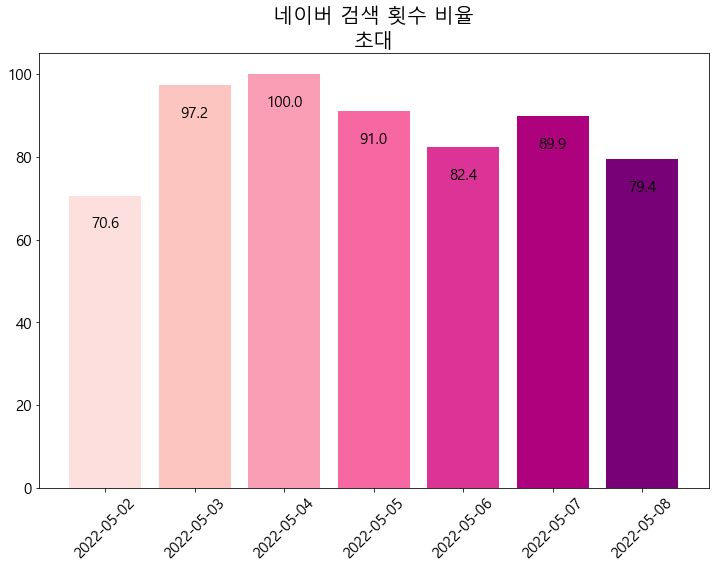

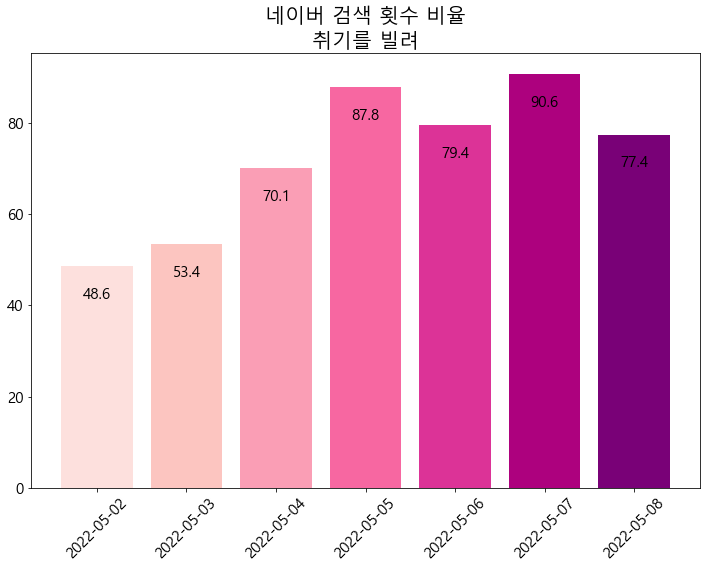

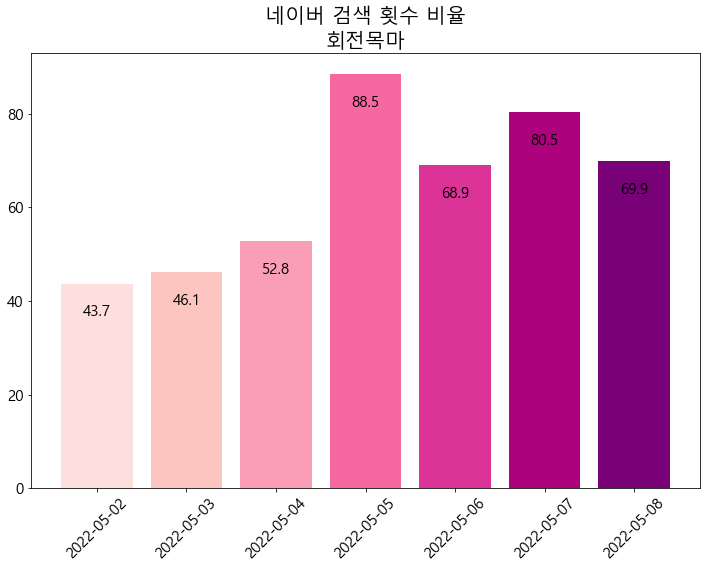

In [8]:
for a in range(outliers_df.shape[0]):
    plt.figure(figsize=(12, 8))
    # file_list중에서 df의 곡들과 매칭되는 인덱스를 받음
    idx = file_list.index(str(outliers_df['곡'][a])+'.xlsx')
    # 매칭된 인덱스로 데이터프레임 만들기
    df_path = os.path.join(dir_path, file_list[idx])
    df = pd.read_excel(df_path)
    df.columns = ['날짜', 'data']
    df = df[6:]
    # str 형태에서 datetime 형식으로 바꿔줌
    df['날짜'] = pd.to_datetime(df['날짜'])
    df = df.loc[('2022-05-02' <= df['날짜']) & (df['날짜'] <= '2022-05-08')]
    df['data'] = df['data'].astype('float')
    
    # 그래프 그리기
    x = df['날짜']
    y = df['data'].tolist()
    # colors = df['data']
    # sizes = df['data']
    
    # 바 차트 색상
    colors = sns.color_palette('RdPu', len(x))

    # plt.scatter(x, y, c=colors, s=sizes*10, alpha=0.4, cmap='viridis');
    plt.bar(x, y, color=colors, zorder=2);
    plt.xticks(fontsize=15,rotation=45)
    plt.yticks( fontsize=15)
    plt.title(f"네이버 검색 횟수 비율\n{outliers_df['곡'][a]}", fontsize=20)
    # plt.colorbar(shrink=1.5)
    
    # 바 위에 숫자 표시하기
    # 좌표: (x축, y축, 표시)
    
    # 숫자가 0인 경우 xticks랑 겹쳐서 일정 비율만큼 간격을 줌
    interval_ratio = math.ceil( max(y) )*0.05
    interval_ratio2 = math.ceil( max(y) )*0.2
    
    for i, v in enumerate(df['날짜']):
        if y[i] <= interval_ratio2:
            plt.text(v, y[i]+interval_ratio, round(y[i],1), fontsize=15, color='black',
                    horizontalalignment='center',
                    verticalalignment='bottom')
        else:
            plt.text(v, y[i]-interval_ratio, round(y[i],1), fontsize=15, color='black',
                    horizontalalignment='center',
                    verticalalignment='top')
    
    # 그래프 저장하기
    plt.savefig(f"{outliers_df['곡'][a]}.png")